In [ ]:
print("hello world!")
print("indoor/outdoor classification by GPS!")

hello world!
indoor/outdoor classification by GPS!


In [ ]:
# step 1
  # read search table - height_china
  # prepare raw files - unzip data

filepath = "./height_china.txt"
f = open(filepath,"r")
lns = f.readlines()
print(lns[:5])
search_table = {}
for ln in lns:
  ln = ln.strip()
  ps = ln.split("\t")
  k = ps[0]
  v1, v2 = ps[1], ps[2]
  search_table[k] = [v1, v2]
print(search_table['10000,2166'])

!unzip collect_data01.zip
#

['10000,2166\t632.253021\t13.930231\n', '10000,2167\t622.117305\t7.529098\n', '10000,2187\t1462.325000\t1.575000\n', '10000,2198\t1093.338095\t14.567298\n', '10000,2202\t1362.200000\t0.000000\n']
['632.253021', '13.930231']
Archive:  collect_data01.zip
   creating: collect_data01/
  inflating: __MACOSX/._collect_data01  
  inflating: collect_data01/vi_0730_百度大厦地下一层_in01.txt  
  inflating: __MACOSX/collect_data01/._vi_0730_百度大厦地下一层_in01.txt  
  inflating: collect_data01/hw_0730_街道到小区_out01.txt  
  inflating: __MACOSX/collect_data01/._hw_0730_街道到小区_out01.txt  
  inflating: collect_data01/mi_0802_地铁站口一带_out01.txt  
  inflating: __MACOSX/collect_data01/._mi_0802_地铁站口一带_out01.txt  
  inflating: collect_data01/vi_0730_百度科技园到大厦大巴内_out02.txt  
  inflating: __MACOSX/collect_data01/._vi_0730_百度科技园到大厦大巴内_out02.txt  
  inflating: collect_data01/hw_0730_百度大厦里_in01.txt  
  inflating: __MACOSX/collect_data01/._hw_0730_百度大厦里_in01.txt  
  inflating: collect_data01/hw_0802_五道口地铁站内_in01.txt  
  inflating

In [ ]:
# step 2
  # classify those raw files as different categories

import os

def getnames(DIR):
  fns = os.listdir(DIR)
  pfs = ["mi", "vi", "hw", "op"]
  tmp = []
  for fn in fns:
    for pf in pfs:
      if fn.startswith(pf):
        tmp.append(fn)
        break
  return tmp

DIR = "./collect_data01"
fns = getnames(DIR)
print("all files: \t", len(fns))

# classify data as different types
fns01 = [] # "地铁室外跑"
fns02 = [] # 地铁站大棚
fns03 = [] # 楼梯电梯地下地铁站口
fns04 = [] # 地铁场景的数据
fns05 = [] # 其他


match_str01 = "地铁室外跑" # "地铁室外跑"
match_str02 = "大棚" # 地铁站大棚
match_str03 = "楼梯电梯" # 楼梯电梯地下地铁站口
match_str04 = "地铁" # 地铁场景的数据
match_str05 = "主流场景"

for fn_tmp in fns:
  if match_str01 in fn_tmp:
    fns01.append(fn_tmp)
  elif match_str02 in fn_tmp:
    fns02.append(fn_tmp)
  elif match_str03 in fn_tmp:
    fns03.append(fn_tmp)
  elif match_str04 in fn_tmp:
    fns04.append(fn_tmp)
  else:
    fns05.append(fn_tmp)
# fns01, fns02, fns03, fns04, fns05

print( match_str01 + ": \t", len(fns01) ) # 12
print( match_str02 + ": \t", len(fns02) ) # 7
match_str03 = "楼梯电梯地下地铁站口"
print( match_str03 + ": \t", len(fns03) ) # 13
match_str04 = "其他地铁场景" # 地铁场景的数据
print( match_str04 + ": \t", len(fns04) ) # 32
print( match_str05 + ": \t", len(fns05) ) # 83
print()

all files: 	 147
地铁室外跑: 	 12
大棚: 	 7
楼梯电梯地下地铁站口: 	 13
其他地铁场景: 	 32
主流场景: 	 83



In [ ]:
# step 3
  # different catigories' raw files -> different directory CSVs

import pandas as pd

def parse_fns(fns):
  cols = ["phone", "date", "info", "in/out", "total", "valid", "precision%", "recall%", "path"]
  df = pd.DataFrame(columns = cols) 
  dic = {"mi": "xiaomi", "vi": "vivo", "hw": "huawei", "op": "oppo"}
  for fn in fns:
    ps = fn.split("_")
    phone = dic[ps[0]]
    date = ps[1]
    info = ps[2]
    inout = "in"
    path = "./collect_data01/" + fn
    if "out" in ps[3]:
      inout = "out"
    tmp = [phone, date, info, inout, 0, 0, 100, -1, path]
    df = df.append(pd.DataFrame( [tmp], columns=cols ), ignore_index = True)
  return df


fns_df01 = parse_fns(fns01) # 12
fns_df02 = parse_fns(fns02) # 7
fns_df03 = parse_fns(fns03) # 13
fns_df04 = parse_fns(fns04) # 32
fns_df05 = parse_fns(fns05) # 83

fns_df01

,phone,date,info,in/out,total,valid,precision%,recall%,path
0,huawei,0730,地铁室外跑,out,0,0,100,-1,./collect_data01/hw_0730_地铁室外跑_out01.txt
1,xiaomi,0728,地铁室外跑,out,0,0,100,-1,./collect_data01/mi_0728_地铁室外跑_out01.txt
2,xiaomi,0729,地铁室外跑,out,0,0,100,-1,./collect_data01/mi_0729_地铁室外跑_out02.txt
3,vivo,0729,地铁室外跑,out,0,0,100,-1,./collect_data01/vi_0729_地铁室外跑_out01.txt
4,huawei,0730,地铁室外跑,out,0,0,100,-1,./collect_data01/hw_0730_地铁室外跑_out02.txt
5,vivo,0730,回龙观龙泽地铁室外跑,out,0,0,100,-1,./collect_data01/vi_0730_回龙观龙泽地铁室外跑_out01.txt
6,xiaomi,0728,地铁室外跑,out,0,0,100,-1,./collect_data01/mi_0728_地铁室外跑_out.txt
7,huawei,0802,霍营回龙观地铁室外跑,in,0,0,100,-1,./collect_data01/hw_0802_霍营回龙观地铁室外跑_sub_out01.txt
8,vivo,0730,霍营回龙观地铁室外跑,out,0,0,100,-1,./collect_data01/vi_0730_霍营回龙观地铁室外跑_out01.txt
9,vivo,0729,地铁室外跑,out,0,0,100,-1,./collect_data01/vi_0729_地铁室外跑_out02.txt


In [ ]:
# step 4:
  # according to those directory CSV, generate training & testing data

# --------------------------- testing data, 处理采集的数据， 生成 csv 文件
# 
def parse_data(ln):
  dic = {}
  ps = ln.strip().split("&")
  for p in ps:
    tmp = p.split("=")
    if len(tmp)==2:
      dic[tmp[0]] = tmp[1]
  return dic

# ------------------------------------
def process_detail_col(details):
  ele, prp, snr, use = [], [], [], []
  ds = details.strip().split("|")
  for d in ds:
    d = d.strip()
    if d=="":
      continue
    tmp = process_detail(d)
    ele.append(tmp[0])
    prp.append(tmp[1])
    snr.append(tmp[2])
    use.append(tmp[3])
  return ele, prp, snr, use

def process_detail(detail):
  ps = detail.split(":")
  ele = ps[0] # ele 俯仰角
  prp = ps[1] # azimuth 方位角
              # 2 - prp, PRN (pseudo-random number) for the satellite.
  snr = ps[3] # snr信噪比
  use = ps[6] # use-in-fix(是否用到该卫星), 0: 表示没有用到, 1: 表示用到
  return ele, prp, snr, use

# 对于扫描到的GPS列表，扫描到所有snr信噪比大于0的卫星总数
# return -> int
def cal_numtotal(snr):
  c = 0
  for v in snr:
    if float(v)>0:
      c = c + 1
  return c

# 对于扫描到的GPS列表，扫描到所有snr信噪比大于15的卫星总数
# return -> int
def cal_snr15num(snr):
  c = 0
  for v in snr:
    if float(v)>=15:
      c = c + 1
  return c

# 对于扫描到的GPS列表，扫描到所有snr信噪比大于20的卫星总数
# return -> int
def cal_snr20num(snr):
  c = 0
  for v in snr:
    if float(v)>=20:
      c = c + 1
  return c

# 对于扫描到的GPS列表，扫描到所有snr信噪比的总和
# return -> float
def cal_snrtotal(snr):
  s = 0
  for v in snr:
    s = s + float(v)
  return round(s, 2)

# 返回平均值
# return -> float
def cal_snrave(snr):
  s = cal_snrtotal(snr)
  n = cal_numtotal(snr)
  return round(s/n, 2)

# 对于扫描到的GPS列表，扫描到所有snr信噪比与ele俯仰角乘积的总和
# return -> float
def cal_elesnrtotal(ele, snr):
  s = 0
  i = 0 
  while i<len(ele):
    s = s + float(ele[i])*float(snr[i])
    i = i + 1
  return round(s, 2)

# 返回对于扫描到的GPS列表，扫描到所有snr信噪比与ele俯仰角乘积的总和/所有信噪比大于0的卫星总数的平均值
# return -> float
def cal_elesnrave(ele, snr):
  s = cal_elesnrtotal(ele, snr)
  n = cal_numtotal(snr)
  return round(s/n, 2)

import math

# 用来记录360°中每10°是否有卫星, 将方位角整除10向上取整,并将数值记录在num中, 所有36个数组中存在大于0数组的数量
# return -> float
def cal_tenTotal(prp):
  proportion_360 = 0
  # 用来记录360°中每10°是否有卫星
  num = []
  for i in range(37):
    num.append(0)
  #
  for v in prp:
    n = int(math.ceil( float(v)/10 ))
    num[n] = num[n] + 1
  #
  i = 1
  while i<=36:
    if num[i]>0:
      proportion_360 = proportion_360 + 1
    i = i + 1
  return round(proportion_360/36, 2) # 乘1000为了保证后面3位的精度返回int值, 

# return -> int
def cal_number(use):
  c = 0
  for v in use:
    if v=="1":
      c = c + 1
  return c

# return -> float
def cal_gpsz_tmean(gpsx, gpsy, gpsh, search_table):
  gpsx = float(gpsx)
  gpsy = float(gpsy)
  k = str(int(gpsx)*100) + "," +  str(int(gpsy)*100)
  phoneh = float(search_table[k][0])
  gpsh = float(gpsh)
  return round(abs(phoneh-gpsh), 2)

def cal_gpsz_stdz(gpsx, gpsy, gpsh, search_table):
  d = cal_gpsz_tmean(gpsx, gpsy, gpsh, search_table)
  gpsx = float(gpsx)
  gpsy = float(gpsy)
  k = str(int(gpsx)*100) + "," +  str(int(gpsy)*100)
  phoneh = float(search_table[k][1]) # ----------- 
  if phoneh<1:
    phoneh = 1
  return round(d/phoneh, 2)

def record_csv(tmp):
  row = ""
  for v in tmp:
    row = row + str(v) + ","
  return row[:-1]

# 36.00000:47.00000:13:12.50000:1:0:0
# 俯仰角    方位角    prn 信噪比  无用 无用 use-in-fix(是否用到该卫星)


import pandas as pd

def generate_csv(filepath, search_table):
  f = open(filepath,"r")
  lns = f.readlines()
  total_lns = len(lns)
  print("whole file length: ", total_lns)

  head_str = "number, snrtotal, snrave, numtotal, elesnrtotal, elesnrave, snr20num, snr15num, gpsz_tmean, gpsz_stdz, tenTotal, R, Class"
  cols = head_str.split(", ")
  df = pd.DataFrame(columns = cols) 
  df_count = 0

  for ln in lns[:]:
    dic = parse_data(ln)
    if "detail" not in dic:
      print(dic)
      continue
    details = dic["detail"].strip()
    #print(details)
    if details == "":
      continue
    try:
      ele, prp, snr, use = process_detail_col(details)
      numtotal = cal_numtotal(snr) # 对于扫描到的GPS列表，扫描到所有snr信噪比大于0的卫星总数
      snr15num = cal_snr15num(snr) # 对于扫描到的GPS列表，扫描到所有snr信噪比大于等于15的卫星总数
      snr20num = cal_snr20num(snr) # 对于扫描到的GPS列表，扫描到所有snr信噪比大于等于20的卫星总数
      snrtotal = cal_snrtotal(snr) # 对于扫描到的GPS列表，扫描到所有snr信噪比的总和
      snrave = cal_snrave(snr) # 返回平均值
      elesnrtotal = cal_elesnrtotal(ele, snr) # 对于扫描到的GPS列表，扫描到所有snr信噪比与ele俯仰角乘积的总和
      elesnrave = cal_elesnrave(ele, snr) # 返回对于扫描到的GPS列表，扫描到所有snr信噪比与ele俯仰角乘积的总和/所有信噪比大于0的卫星总数的平均值
      tenTotal = cal_tenTotal(prp)
      number = cal_number(use) # 手机将卫星用于定位的数量, use-in-fix 中 1 的个数
      R = float(dic['gpsr']) # * numtotal
      gpsz_tmean = cal_gpsz_tmean(dic['gpsx'], dic['gpsy'], dic['gpsh'], search_table)
      gpsz_stdz = cal_gpsz_stdz(dic['gpsx'], dic['gpsy'], dic['gpsh'], search_table)
      Class = "indoor"
      if dic["inout"]=="0":
        Class = "outdoor"
    except:
      #print("wrong")
      continue
    
    tmp = [number, snrtotal, snrave, numtotal, elesnrtotal, elesnrave, snr20num, snr15num, gpsz_tmean, gpsz_stdz, tenTotal, R, Class]
    df = df.append(pd.DataFrame( [tmp], columns=cols ), ignore_index = True)
    #print(record_csv(tmp))
    #print(ele, prp, snr, use)
    #print(number, snrtotal, snrave, numtotal, elesnrtotal, elesnrave, snr20num, snr15num, gpsz_tmean, gpsz_stdz, tenTotal, R, Class)
  #dic
  #df.to_csv("testdata01.csv", index=False)
  print(df.shape)
  return df, total_lns


def generate_report(fns_df):
  df = []
  i = 0
  while i<len(fns_df[:]):
    filepath = fns_df["path"].iloc[i]
    print(i, filepath)
    tmp, total = generate_csv(filepath, search_table)
    # ---
    fns_df.iloc[i, 4] = total
    if len(tmp)>0:
      #recall = test_data(forest, tmp)
      fns_df.iloc[i, 5] = len(tmp)
      #fns_df.iloc[i, 7] = round(recall*100, 2)
    i = i + 1
    # ---
    df.append(tmp)
  df = pd.concat(df)  
  # shuffle
  #df = df.sample(frac = 1).reset_index(drop=True)
  print(df.shape)
  return df

  


"""
filepath = fps01[14]
print(filepath)
df = generate_csv(filepath, search_table)
df
"""
df01 = generate_report(fns_df01)
df02 = generate_report(fns_df02)
df03 = generate_report(fns_df03)
df04 = generate_report(fns_df04)
df05 = generate_report(fns_df05)
print(df01.shape, df02.shape, df03.shape, df04.shape, df05.shape)

In [ ]:
tmp, total = generate_csv('AB座室外0820.txt', search_table) # 对比采集与地图_20210820.txt


whole file length:  265
{'collect_user': 'guihan', 'collect_time': '2021-08-20 18:08:05', 'cuid': '6D2D5490D866C8CC56DDF0E91FB01896|XT53GJXLV', 'bdn': '', 'bdf': '', 'inout': '0', 'cl_t': '1629454085', 'cl': '-1|-1|-1|-1', 'wf': 'fed45e4ab07e;36;|00bed5d0a87d;51;|00bed5d0a87b;52;|c4041503c956;55;|c4143cfb5dc2;64;|c4143cfb5dc0;64;|c4143cfb5dc3;65;|c4143cfb5dc1;65;|c4143cfb5dc4;65;|00bed5d0a880;66;|00bed5d0a882;68;|6c99890d8ca2;68;|6c99890d8ca1;68;|6c99890d8ca3;68;|c4143cf35c5e;68;|c4143cf35c5c;68;', 'wf2': '|c4143cf35c5d;68;|c4143cf35c5f;68;|c4143cf35c5b;68;|6c99890d8ca0;68;|6c99890d8ca4;68;|86cca88211b4;69;|c4143cf35c54;70;|c4143ce536d0;71;|c4143cf35c52;71;|c4143cf35c51;71;|c4143cf35c50;71;|c4143cf35c53;71;|c4143ce536d3;71;|c4143ce536d4;71;|c4143ce536d2;72;|c4143ce536d1;73;|c4143cfb5dcb;73;|f42a7df1a3cf;74;|c4143cfb5dce;74;|c4143cfb5dcf;74;|c4143cfb5dcd;74;|c4143cfb5dcc;74;|6c99890d8cae;75;|9e7967056205;75;|6c99890d8cac;75;|6c99890d8caf;75;|6c99890d8cad;75;|808f1d83300f;75;|be796705620

In [ ]:
tmp.shape
tmp
tmp.to_csv("ABtower_out.csv", index=False)

In [ ]:
# step 5
  # write those training & testing data to CSV files for further use
df01.to_csv("test01.csv", index=False)
df02.to_csv("test02.csv", index=False)
df03.to_csv("test03.csv", index=False)
df04.to_csv("test04.csv", index=False)
df05.to_csv("test05.csv", index=False)
#
print("test01: ", len(df01.loc[df01["Class"]=="indoor"]), "\t", len(df01.loc[df01["Class"]=="outdoor"]))
print("test02: ", len(df02.loc[df02["Class"]=="indoor"]), "\t", len(df02.loc[df02["Class"]=="outdoor"]))
print("test03: ", len(df03.loc[df03["Class"]=="indoor"]), "\t", len(df03.loc[df03["Class"]=="outdoor"]))
print("test04: ", len(df04.loc[df04["Class"]=="indoor"]), "\t", len(df04.loc[df04["Class"]=="outdoor"]))
print("test05: ", len(df05.loc[df05["Class"]=="indoor"]), "\t", len(df05.loc[df05["Class"]=="outdoor"]))
print()

test01:  0 	 963
test02:  1119 	 0
test03:  1920 	 0
test04:  2475 	 2617
test05:  11637 	 9909



In [ ]:
# step 6
  # read CSV files for different models' training & testing

import pandas as pd
import numpy as np

#
def preprocess(dataxy2):
  print("-----------------------")
  i = 0
  cind = 0
  coutd = 0
  while i<len(dataxy2["Class"]):
    v = dataxy2["Class"][i]
    if v=="indoor":
      cind = cind + 1
    elif v=="outdoor":
      coutd = coutd + 1
    i = i + 1
  print("indoor: ", cind, ", outdoor: ", coutd, cind+coutd, len(dataxy2["Class"]))
  #
# training data: 
#   indoor  9014
#   outdoor 7211
  dataxy_tmp = dataxy2.copy()
  dataxy_tmp_out = dataxy_tmp.loc[ dataxy_tmp["Class"]=="outdoor" ]
  dataxy_tmp_in = dataxy_tmp.loc[ dataxy_tmp["Class"]=="indoor" ]
  dataxy_tmp_in = dataxy_tmp_in.sample(n=len(dataxy_tmp_out), random_state=0)
  print(dataxy_tmp_in.shape, dataxy_tmp_out.shape)
  dataxy_tmp = [dataxy_tmp_in, dataxy_tmp_out]
  dataxy_tmp = pd.concat(dataxy_tmp)
  print(dataxy_tmp.shape)
  dataxy_tmp = dataxy_tmp.sample(frac = 1).reset_index(drop=True)
  #dataxy_tmp.head(10)
  print("-----------------------")
  return dataxy_tmp


# 12 features + 1 class
cols = ['number','snrtotal','snrave','numtotal','elesnrtotal','elesnrave','snr20num','snr15num','gpsz_tmean','gpsz_stdz','tenTotal','R','Class']
cols_update = ['snrave','numtotal','elesnrtotal','elesnrave','snr15num','gpsz_tmean', 'tenTotal','R','Class']
cols_update = ['number','snrtotal','snrave','numtotal','elesnrtotal','elesnrave','snr20num','snr15num','gpsz_tmean','tenTotal','R','Class']
cols_update = cols

# train
# sparse
dataxy1 = pd.read_csv("./traindatafromDataset3.csv", names=cols) # (24398, 13)  17142 in + 7256 out
# no zero, filtered based on dataxy1
dataxy2 = pd.read_csv("./traindata_NoZero.csv", names=cols) # (16225, 13) 9014 in + 7211 out
#dataxy2 = preprocess(dataxy2)
print( dataxy1.shape, dataxy2.shape )

# test
# sparse
dataxy3 = pd.read_csv("./testdatafromDataset4.csv")
# no zero
dataxy4 = pd.read_csv("./testdata_NoZero.csv", names=cols)
print( dataxy3.shape, dataxy4.shape )

# indoor & outdoor, -> traindatafromDataset3.csv / dataxy1
dataxy_in = pd.read_csv("./indoor.csv") # (17142, 13)
# no zero
dataxy_out = pd.read_csv("./outdoor.csv") # (7256, 13)
print( dataxy_in.shape, dataxy_out.shape )
# 17142+7256=24398 

from sklearn.utils import shuffle

#dataxy_all = pd.read_csv("./testdata01.csv")
#dataxy_all = shuffle(dataxy_all)

#
dataxy_sub01 = pd.read_csv("./test01.csv") # "地铁室外跑"
dataxy_sub02 = pd.read_csv("./test02.csv") # 地铁站大棚
dataxy_sub03 = pd.read_csv("./test03.csv") # 楼梯电梯地下地铁站口
dataxy_sub04 = pd.read_csv("./test04.csv") # 地铁场景的数据
dataxy_sub05 = pd.read_csv("./test05.csv") # "主流场景"
print(dataxy_sub01.shape, dataxy_sub02.shape, dataxy_sub03.shape, dataxy_sub04.shape, dataxy_sub05.shape)


dataxy_sub00 = pd.concat([dataxy_sub02, dataxy_sub03, dataxy_sub04, dataxy_sub05])
print(dataxy_sub00.shape)

log_dataxy01 = pd.read_csv("./log_data01.csv") 
log_dataxy01.shape

(24398, 13) (16225, 13)
(3592, 13) (2650, 13)
(17142, 13) (7256, 13)
(963, 13) (1119, 13) (1920, 13) (5092, 13) (21546, 13)
(29677, 13)


(19237, 13)

In [ ]:
log_dataxy01
dataxy2

def convert_to_int(dataxy2):
  tmp = dataxy2.copy()
  tmp['snrtotal'] = tmp['snrtotal'].astype(int)
  tmp['snrave'] = tmp['snrave'].astype(int)
  tmp['elesnrtotal'] = tmp['elesnrtotal'].astype(int)
  tmp['elesnrave'] = tmp['elesnrave'].astype(int)
  tmp['tenTotal'] = tmp['tenTotal'] * 1000
  tmp['tenTotal'] = tmp['tenTotal'].astype(int)
  tmp['R'] = tmp['R'].astype(int)

  return tmp

convert_to_int(dataxy2)

,number,snrtotal,snrave,numtotal,elesnrtotal,elesnrave,snr20num,snr15num,gpsz_tmean,gpsz_stdz,tenTotal,R,Class
0,0,0,0,36,0,0,0,0,50.45,5.293307,640,59,indoor
1,0,189,21,9,7096,788,6,9,16.67,1.749047,220,24,indoor
2,30,793,26,30,38465,1282,30,30,1.11,0.296634,580,2,outdoor
3,0,215,23,9,8273,919,8,8,16.67,1.749047,190,24,indoor
4,0,14,14,1,840,840,0,0,58.90,6.179896,60,3793,indoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16220,0,23,0,36,770,21,0,0,50.45,5.293307,690,59,indoor
16221,27,745,26,28,37270,1331,27,28,2.48,0.662750,560,1,outdoor
16222,0,19,1,18,579,32,0,1,35.95,3.771940,390,69,indoor
16223,4,182,8,22,7129,324,4,6,32.54,5.285525,500,100,indoor


In [ ]:
# step 7
  # generic feature analysis
  # split features & labels

#
# discrete features analysis
  # (0, 31) [28, 31] can be merged          - number
  # (3, 37) [1, 8] can be merged            - numtotal
  # (6, 32) [26, 31] can be merged          - snr20num
  # (7, 32) [0, 4], [28, 31] can be merged  - snr15num
  # (10, 26) [0.06, 0.22] can be merged     - tenTotal

# between discrete and continuous feature
  # 11, >=75 -> 75, //2, 38                 - R


# continuous features 
  # 1, //30, 35                             - snrtotal
  # 2, //1, 36                              - snrave
  # 4, //1600, 31                           - elesnrtotal
  # 5, //60, 33                             - elesnrave
  # 8, //5, 35                              - gpsz_tmean
  # 9, //1, 22                              - gpsz_stdz

# round all float to int
def convert_int(_dataxy):
  cls = _dataxy.columns
  tmp = _dataxy.copy()
  tmp['tenTotal'] = round(tmp['tenTotal']*1000)
  for cl in cls[:-1]:
    tmp[cl] = round(tmp[cl])
  for cl in cls[:-1]:
    tmp[cl] = tmp[cl].astype(int)
  return tmp

# process features when needed
def feature_engineering(dataxy2, cols, f):
  if f:
    # convert_int(dataxy2)
    return convert_to_int(dataxy2)
  tmp = dataxy2.copy()
  print(tmp.shape)
  i = 0
  L = len(tmp)
  while i<L:
    # 11
    v = tmp.iloc[i, 11]
    v = int(v+0.5)
    if v>=75:
      v = 75
    tmp.iloc[i, 11] = v//2
    # 4
    v = tmp.iloc[i, 4]
    v = int(v+0.5)
    tmp.iloc[i, 4] = v//1600
    # 1
    v = tmp.iloc[i, 1]
    v = int(v+0.5)
    tmp.iloc[i, 1] = v//30
    # 8
    v = tmp.iloc[i, 8]
    v = int(v+0.5)
    tmp.iloc[i, 8] = v//5
    # 5
    v = tmp.iloc[i, 5]
    v = int(v+0.5)
    tmp.iloc[i, 5] = v//60
    # 9
    v = tmp.iloc[i, 9]
    v = int(v+0.5)
    tmp.iloc[i, 9] = v
    i = i + 1
  return tmp


# split data as: features + labels
def split_xy(dataxy2):
  dataxy = feature_engineering(  dataxy2, cols, True ) # dataxy2 # dataxy_all[:16000]

  X_train = dataxy[cols_update[:-1]]
  y_train = dataxy[cols_update[-1]]
  print( X_train.shape, y_train.shape )
  return X_train, y_train


# original model - random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score



# using model to test/predict
def test_data(model, dataxy2, dataxy5):
  print("---------------------------------- testing the model")
  #
  # training, testing data
  X_train, y_train = split_xy(dataxy2)
  X_test, y_test = split_xy(dataxy5)
  #
  le = preprocessing.LabelEncoder()
  le = le.fit(y_train) 
  y_train = le.transform(y_train) 
  y_test = le.transform(y_test) 
  print("0: ", le.inverse_transform([0]))
  print("1: ", le.inverse_transform([1]))
  # 
  print( "training data: \t", dataxy2.shape )
  print( X_train.shape, y_train.shape )
  print( "testing data: \t", dataxy5.shape )
  print( X_test.shape, y_test.shape )
  #
  train_acc, test_acc = model.score(X_train, y_train), model.score(X_test, y_test)
  print("training accuracy: \t", train_acc) 
  print("testing accuracy: \t", test_acc) 
  #
  print("overall testing report: ")
  y_pred = model.predict(X_test)
  tmp = classification_report(np.array(y_test),y_pred)
  tmp = tmp.split('\n')
  for ln in tmp:
    print(ln)
  return test_acc


  #from sklearn.externals import joblib
  #forest = joblib.load('./RFmodel_final.pkl')

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# training, testing data
X_train, y_train = split_xy(dataxy2)
X_test, y_test = split_xy(dataxy_sub00)
le = preprocessing.LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))

(16225, 12) (16225,)
(29677, 12) (29677,)
0:  ['indoor']
1:  ['outdoor']


In [ ]:
X_test

,number,snrtotal,snrave,numtotal,elesnrtotal,elesnrave,snr20num,snr15num,gpsz_tmean,gpsz_stdz,tenTotal,R
0,19,863,24,35,32008,914,33,35,157.83,25.53,640,3
1,25,850,24,35,32044,915,32,33,156.83,25.37,690,3
2,20,812,25,32,33269,1039,29,31,11.10,11.10,530,4
3,23,874,23,37,31189,842,32,35,150.83,24.40,640,4
4,24,730,23,31,27996,903,26,31,159.83,25.85,530,5
...,...,...,...,...,...,...,...,...,...,...,...,...
21541,26,1129,30,37,43149,1166,36,36,146.83,23.75,640,2
21542,0,46,15,3,3252,1084,0,2,89.67,89.67,250,54
21543,4,139,13,10,2977,297,2,4,312.83,50.60,220,40
21544,7,504,21,24,15613,650,13,21,49.10,49.10,310,7


In [ ]:
# step 8 
  # random forest training & testing

# training, testing data
X_train, y_train = split_xy(dataxy2)
X_test, y_test = split_xy(dataxy_sub00)
le = preprocessing.LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))


# searching for the optimal parameters
f = False
#f = True
if f:
  mn = []
  for ne in range(4, 25):
    for md in range(4, 16):
      for rs in range(10):
        forest = RandomForestClassifier(n_estimators=ne, random_state=rs, max_depth=md)
        forest.fit(X_train, y_train)
        d1, d2 = forest.score(X_train, y_train), forest.score(X_test, y_test)
        d = abs(d1 - d2)
        print(round(d, 3), round(d1, 3), round(d2, 3), ne, md, rs)
        mn.append( (round(d, 3), round(d1, 3), round(d2, 3), ne, md, rs) )
  mn = sorted(mn, key=lambda x:x[2], reverse=True)
  #mn = sorted(mn, key=lambda x:x[1], reverse=True)
  print(mn[:10]) # top 10


# 11 features
# (0.15, 1.0, 0.849, 4, 11, 3), (0.152, 1.0, 0.848, 6, 11, 3), (0.165, 0.999, 0.835, 5, 11, 3), (0.163, 0.994, 0.831, 4, 6, 4), (0.172, 1.0, 0.828, 8, 11, 3), (0.173, 1.0, 0.827, 7, 11, 3), (0.173, 1.0, 0.827, 10, 11, 3), (0.174, 0.999, 0.826, 6, 10, 9), (0.176, 1.0, 0.824, 4, 14, 3), (0.176, 1.0, 0.824, 9, 11, 3)
# 8 features
# (0.133, 1.0, 0.867, 5, 14, 2), (0.146, 1.0, 0.854, 6, 12, 4), (0.148, 1.0, 0.852, 6, 14, 2), (0.155, 1.0, 0.845, 5, 13, 2), (0.149, 0.992, 0.843, 4, 5, 6), (0.157, 1.0, 0.843, 7, 12, 4), (0.156, 1.0, 0.843, 9, 10, 2), (0.158, 1.0, 0.842, 4, 11, 2), (0.158, 1.0, 0.842, 8, 12, 4), (0.158, 1.0, 0.842, 12, 13, 2)]
# ------------------
# 11 features
# (0.077, 0.994, 0.917, 4, 6, 4), (0.093, 1.0, 0.906, 5, 11, 5), (0.097, 1.0, 0.903, 4, 13, 3), (0.104, 0.999, 0.895, 5, 9, 2), (0.107, 0.999, 0.892, 4, 9, 3), (0.093, 0.983, 0.89, 4, 4, 1), (0.11, 0.999, 0.889, 5, 10, 3), (0.095, 0.983, 0.888, 7, 4, 1), (0.113, 1.0, 0.887, 16, 12, 0), (0.115, 1.0, 0.885, 4, 12, 3)
# 12 features
# (0.063, 1.0, 0.937, 11, 12, 0), (0.066, 1.0, 0.934, 13, 12, 0), (0.07, 1.0, 0.93, 14, 12, 0), (0.078, 1.0, 0.922, 15, 12, 0), (0.082, 1.0, 0.918, 6, 11, 4), (0.082, 1.0, 0.917, 16, 12, 0), (0.087, 1.0, 0.913, 11, 13, 5), (0.089, 1.0, 0.911, 10, 13, 5), (0.093, 0.999, 0.906, 14, 9, 0), (0.093, 0.999, 0.905, 16, 9, 0)
# 12 features
# (0.054, 0.999, 0.945, 4, 10, 0), (0.078, 0.999, 0.921, 6, 10, 0), (0.081, 1.0, 0.919, 9, 12, 0), (0.082, 1.0, 0.917, 6, 11, 4), (0.084, 1.0, 0.916, 10, 12, 0), (0.084, 1.0, 0.916, 10, 13, 5), (0.084, 1.0, 0.915, 10, 13, 4), (0.087, 1.0, 0.913, 9, 13, 4), (0.088, 0.999, 0.912, 8, 10, 0), (0.09, 1.0, 0.91, 8, 13, 5)
# 12 features - round - int
# (0.072, 0.998, 0.926, 4, 11, 3), (0.084, 0.999, 0.915, 5, 11, 3), (0.089, 0.999, 0.91, 8, 11, 3), (0.091, 0.999, 0.909, 7, 11, 3), (0.094, 1.0, 0.905, 9, 11, 3), (0.103, 0.999, 0.896, 11, 11, 3), (0.102, 0.997, 0.895, 6, 9, 5), (0.103, 0.997, 0.894, 5, 9, 5), (0.099, 0.99, 0.891, 8, 5, 3), (0.108, 0.998, 0.89, 4, 9, 5)
# 12 features
# [(0.054, 0.999, 0.945, 4, 10, 0), (0.078, 0.999, 0.921, 6, 10, 0), (0.081, 1.0, 0.919, 9, 12, 0), (0.082, 1.0, 0.917, 6, 11, 4), (0.084, 1.0, 0.916, 10, 12, 0), (0.084, 1.0, 0.916, 10, 13, 5), (0.084, 1.0, 0.915, 10, 13, 4), (0.087, 1.0, 0.913, 9, 13, 4), (0.088, 0.999, 0.912, 8, 10, 0), (0.09, 1.0, 0.91, 8, 13, 5)]
# 12 features
# (0.155, 0.999, 0.844, 4, 10, 0), (0.154, 0.995, 0.84, 4, 6, 3), (0.165, 0.998, 0.833, 7, 8, 1), (0.174, 1.0, 0.825, 6, 11, 4), (0.175, 1.0, 0.825, 10, 13, 4), (0.177, 1.0, 0.823, 9, 12, 0), (0.178, 1.0, 0.822, 9, 13, 4), (0.178, 1.0, 0.822, 10, 15, 9), (0.179, 1.0, 0.821, 4, 15, 7), (0.177, 0.998, 0.821, 9, 8, 1)
# 12
# (0.143, 0.998, 0.855, 4, 9, 4), (0.152, 0.999, 0.847, 12, 9, 4), (0.151, 0.999, 0.847, 14, 9, 4), (0.154, 0.999, 0.845, 16, 9, 4), (0.151, 0.995, 0.843, 4, 6, 3), (0.159, 0.999, 0.841, 4, 11, 3), (0.157, 0.998, 0.841, 7, 8, 5), (0.157, 0.998, 0.841, 9, 8, 5), (0.161, 0.998, 0.838, 8, 9, 4), (0.159, 0.998, 0.838, 10, 8, 5)
"""
01 # 地铁室外跑
02 # 地铁站大棚
03 # 楼梯电梯地下地铁站口
04 # 地铁场景的数据
05 # 主流场景
"""
# 20, 12
# 9, 12
# 4, 10, 0
forest = RandomForestClassifier(n_estimators=4, random_state=4, max_depth=9)
forest.fit(X_train, y_train)
#

tmp = test_data(forest, dataxy2, dataxy_sub05)

#
# the importance of the every feature
f = False
#f = True
if f:
  importances = forest.feature_importances_
  importances
  feat_labels = cols_update
  indices = np.argsort(importances)[::-1]
  for f in range(len(cols_update)-1):
      print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))



(16225, 12) (16225,)
(29677, 12) (29677,)
0:  ['indoor']
1:  ['outdoor']
---------------------------------- testing the model
(16225, 12) (16225,)
(21546, 12) (21546,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (21546, 13)
(21546, 12) (21546,)
training accuracy: 	 0.998151001540832
testing accuracy: 	 0.8967789844982827
overall testing report: 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     11637
           1       0.88      0.90      0.89      9909

    accuracy                           0.90     21546
   macro avg       0.90      0.90      0.90     21546
weighted avg       0.90      0.90      0.90     21546



In [ ]:
#
def log_evaluation(y_test, y_pred):
  yt = {0:0, 1:0}
  for v in y_test:
    if v == 0:
      yt[0] = yt[0] + 1
    else:
      yt[1] = yt[1] + 1
  #
  yp = {0:0, 1:0}
  for v in y_pred:
    if v == 0:
      yp[0] = yp[0] + 1
    else:
      yp[1] = yp[1] + 1
  #
  return yt, yp

def train_test_data(dataxy2, log_dataxy01, model, mode=0):
  X_train, y_train = split_xy(dataxy2)
  X_test, y_test = split_xy(log_dataxy01)
  le = preprocessing.LabelEncoder()
  le = le.fit(y_train) 
  y_train = le.transform(y_train) 
  y_test = le.transform(y_test) 
  print("0: ", le.inverse_transform([0]))
  print("1: ", le.inverse_transform([1]))
  # X_train, y_train, X_test, y_test
  #
  if mode==0:
    y_pred = model.predict(X_test)
  else:
    y_pred = model.predict_classes(X_test)
    y_pred = y_pred.reshape(len(y_pred),)

  yt, yp = log_evaluation(y_test, y_pred)
  yt0 = round(yt[0]/(yt[0]+yt[1]), 2)
  yt1 = round(yt[1]/(yt[0]+yt[1]), 2)
  yp0 = round(yp[0]/(yp[0]+yp[1]), 2)
  yp1 = round(yp[1]/(yp[0]+yp[1]), 2)
  print("0: ", le.inverse_transform([0]), yt0, yp0)
  print("1: ", le.inverse_transform([1]), yt1, yp1)
  #
  return y_test, y_pred



#X_train, y_train, X_test, y_test = train_test_data(dataxy2, log_dataxy01)
yt, yp = train_test_data(dataxy2, log_dataxy01, forest)


(16225, 12) (16225,)
(19237, 12) (19237,)
0:  ['indoor']
1:  ['outdoor']
0:  ['indoor'] 0.1 0.35
1:  ['outdoor'] 0.9 0.65


In [ ]:
# step 9
  # logistic regression training & testing

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# https://andy1314chen.github.io/2017/09/07/sklearn库LogisticRegression使用及简单调参/
def train_LR(X_train, y_train, f=False, mi=700, cw=None):
  log_reg = LogisticRegression(penalty='l2', solver='sag',max_iter=mi, class_weight=cw)
                        # solver参数决定了我们对逻辑回归损失函数的优化方法: liblinear, lbfgs, newton-cg, sag
  log_reg.fit(X_train, y_train)
  X = X_train
  if f:
    X = StandardScaler().fit_transform(X)
  acc = log_reg.score(X, y_train)
  print("training accuracy: ", acc)
  return log_reg

def test_LR(log_reg, X_test, y_test, f=False):
  print("---------------------------------- testing the model")
  X = X_test
  if f:
    X = StandardScaler().fit_transform(X)
  acc = log_reg.score(X, y_test)
  print("testing accuracy: ", acc)
  #
  y_pred = log_reg.predict(X_test)
  tmp = classification_report(np.array(y_test),y_pred)
  tmp = tmp.split('\n')
  for ln in tmp:
    print(ln)
  return acc


# training, testing data
X_train, y_train = split_xy(dataxy2)
X_test, y_test = split_xy(dataxy_sub00)
le = preprocessing.LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))


f = False
# searching
search_flag = False
#search_flag = True
if search_flag:
  mn = [] 
  for mi in range(300, 1050, 50):
    for w in range(10, 91, 2):
      cw = {0:w/100, 1:(100-w)/100}
      log_reg = train_LR(X_train, y_train, f, mi, cw)
      tmp = test_LR(log_reg, X_test, y_test, f)
      print(mi, cw, tmp)
      mn.append( (mi, w, tmp) )
  mn = sorted(mn, key=lambda x:x[2], reverse=True)
  print(mn[:10])
"""
[(660, 81, 0.8687535802136335),
 (540, 82, 0.8686861879570037),
 (580, 82, 0.8686524918286889),
 (560, 82, 0.868618795700374),
 (680, 81, 0.8685514034437443),
 (500, 83, 0.8684840111871146),
 (720, 81, 0.8684840111871146),
 (700, 81, 0.8684166189304849),
 (520, 82, 0.8683492266738552),
 (640, 81, 0.8683492266738552)]

(640, 90, 0.8752436647173489),
 (620, 90, 0.8745474798106377),
 (600, 90, 0.8742225935208391),
 (580, 90, 0.8736192332683561),
 (560, 90, 0.8733407593056716),
 (540, 90, 0.8729230483616448),
 (640, 89, 0.8727373990531885),
 (520, 90, 0.8723661004362758),
 (620, 89, 0.8722268634549336),
 (500, 90, 0.8719948018193632)
"""

# (1000, 90, 0.8041581022340533), (950, 90, 0.8029113454864036), (900, 90, 0.8017656771236985), (850, 90, 0.800687401017623), (1000, 88, 0.8003167436061597), (800, 90, 0.7995417326549179), (950, 88, 0.7990362907301951), (750, 90, 0.7985308488054722), (900, 88, 0.7981601913940088), (700, 90, 0.7973851804427671)
print()

(16225, 12) (16225,)
(29677, 12) (29677,)
0:  ['indoor']
1:  ['outdoor']



In [ ]:
# training, testing data
X_train, y_train = split_xy(dataxy2)
X_test, y_test = split_xy(dataxy_sub00)
le = preprocessing.LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))

mi = 5200
cw = {0:0.90, 1:0.10}
log_reg = train_LR(X_train, y_train, f, mi, cw)
tmp = test_LR(log_reg, X_test, y_test, f)

yt, yp = train_test_data(dataxy2, log_dataxy01, log_reg)

(16225, 12) (16225,)
(29677, 12) (29677,)
0:  ['indoor']
1:  ['outdoor']
training accuracy:  0.8302003081664099
---------------------------------- testing the model
testing accuracy:  0.8717525356336557
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     17151
           1       0.78      0.96      0.86     12526

    accuracy                           0.87     29677
   macro avg       0.87      0.88      0.87     29677
weighted avg       0.89      0.87      0.87     29677

(16225, 12) (16225,)
(19237, 12) (19237,)
0:  ['indoor']
1:  ['outdoor']
0:  ['indoor'] 0.1 1.0
1:  ['outdoor'] 0.9 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
# step 10
  # polynomial logistic regression training & testing

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(X_train, y_train, mi=660, cw=None, dg=2):
    lr = train_LR(X_train, y_train, False, mi, cw)
    return Pipeline([
        ('poly', PolynomialFeatures(degree=dg)),
        # ('std_scaler', StandardScaler()),
        ('log_reg', lr)
    ])

# training, testing data
X_train, y_train = split_xy(dataxy2)
X_test, y_test = split_xy(dataxy_sub05)
le = preprocessing.LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))

search_flag = False
#search_flag = True
if search_flag:
  mn = []
  for mi in range(800, 820, 20):
    for w in range(10, 91, 2):
      cw = {0:w/100, 1:(100-w)/100}
      for dg in range(1, 3):
        poly_log_reg = PolynomialLogisticRegression(X_train, y_train, mi, cw, dg)
        poly_log_reg.fit(X_train, y_train)
        train_acc, test_acc = poly_log_reg.score(X_train, y_train), poly_log_reg.score(X_test, y_test)
        print(mi, cw, dg, train_acc, test_acc)
        mn.append( (mi, cw, dg, train_acc, test_acc) )
  mn = sorted(mn, key=lambda x:x[4], reverse=True)
  print(mn[:10])



(16225, 12) (16225,)
(21546, 12) (21546,)
0:  ['indoor']
1:  ['outdoor']


In [ ]:
# step 11
  # linear SVM training & testing

from sklearn.svm import LinearSVC

def str_int(dataxy):
  tmp = dataxy.copy()
  for i in range(len(tmp)):
    if tmp.loc[i, "Class"] == "indoor":
      tmp.loc[i, "Class"] = 1
    else:
      tmp.loc[i, "Class"] = 0
  return tmp


# training, testing data
X_train, y_train = split_xy(dataxy2)
X_test, y_test = split_xy(dataxy_sub00)
le = preprocessing.LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))

search_flag = False
#search_flag = True
if search_flag:
  mn = []
  for w in range(10, 91, 1):
    cw = {0:w/100, 1:(100-w)/100}
    for rs in range(9):
      clf = LinearSVC(loss='hinge', class_weight=cw, random_state=1) #{0:0.8, 1:0.2}
      clf.fit(X_train, y_train)
      train_acc, test_acc = clf.score(X_train, y_train), clf.score(X_test, y_test)
      print(cw, rs, train_acc, test_acc)
      mn.append( (cw, rs, train_acc, test_acc) )
  mn = sorted(mn, key=lambda x:x[3], reverse=True)
  print(mn[:5])

clf = LinearSVC(loss='hinge', C=1.0, class_weight={0:0.6, 1:0.4}, random_state=4)  # 1, 4, 5
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train), clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
tmp = classification_report(np.array(y_test),y_pred)
tmp = tmp.split('\n')
for ln in tmp:
  print(ln)

yt, yp = train_test_data(dataxy2, log_dataxy01, clf)

(16225, 12) (16225,)
(29677, 12) (29677,)
0:  ['indoor']
1:  ['outdoor']
0.936517719568567 0.7525019375273782
              precision    recall  f1-score   support

           0       1.00      0.57      0.73     17151
           1       0.63      1.00      0.77     12526

    accuracy                           0.75     29677
   macro avg       0.81      0.79      0.75     29677
weighted avg       0.84      0.75      0.75     29677

(16225, 12) (16225,)
(19237, 12) (19237,)
0:  ['indoor']
1:  ['outdoor']
0:  ['indoor'] 0.1 0.0
1:  ['outdoor'] 0.9 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# step 12
  # linear/gaussian SVM training & testing

#
from sklearn import svm 

# training, testing data
X_train, y_train = split_xy(dataxy2)
X_test, y_test = split_xy(dataxy_sub00)
le = preprocessing.LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))

for rs in range(1):
  clf = svm.SVC(C=300, probability=False)
  clf.fit(X_train, y_train)
  tr_acc, te_acc = clf.score(X_train, y_train), clf.score(X_test, y_test)
  print(rs, tr_acc, te_acc)


from sklearn.svm import SVC


# training, testing data
X_train, y_train = split_xy(dataxy2)
X_test, y_test = split_xy(dataxy_sub00)
le = preprocessing.LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))


svc_model = SVC(kernel='rbf', C=1, probability=False)
svc_model.fit(X_train, y_train)
svc_model.score(X_train, y_train), svc_model.score(X_test, y_test)

yt, yp = train_test_data(dataxy2, log_dataxy01, svc_model)

(16225, 12) (16225,)
(29677, 12) (29677,)
0:  ['indoor']
1:  ['outdoor']
0 0.9646841294298921 0.7724163493614584
(16225, 12) (16225,)
(29677, 12) (29677,)
0:  ['indoor']
1:  ['outdoor']
(16225, 12) (16225,)
(19237, 12) (19237,)
0:  ['indoor']
1:  ['outdoor']
0:  ['indoor'] 0.1 1.0
1:  ['outdoor'] 0.9 0.0


In [ ]:
# step 13
  # Nu SVM training & testing

from sklearn.svm import NuSVC

# training, testing data
X_train, y_train = split_xy(dataxy2)
X_test, y_test = split_xy(dataxy_sub00)
le = preprocessing.LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))

"""
6 0.7122342064714946 0.8398759982478013
7 0.7123574730354392 0.8651817906122586
8 0.7113713405238828 0.8911952016713279
"""
search_flag = False
#search_flag = True
if search_flag:
  mn = []
  for i in range(800, 889):
    clf = NuSVC(nu=i/1000, kernel='poly') 
    clf.fit(X_train, y_train)
    tr_acc, te_acc = clf.score(X_train, y_train), clf.score(X_test, y_test)
    print(i, tr_acc, te_acc)
    mn.append((i, tr_acc, te_acc))
  mn = sorted(mn, key=lambda x:x[2], reverse=True)
  print(mn[:5])
#
# (850, 0.703482280431433, 0.905280183306938), (848, 0.7044684129429892, 0.9049769181521043), (849, 0.7039137134052388, 0.9049769181521043), (854, 0.7010169491525424, 0.9048758297671597), (851, 0.7029275808936826, 0.9047073491255855)
clf = NuSVC(nu=0.85, kernel='poly') # nu=80-88, -> 84, 85, 86
clf.fit(X_train, y_train)
tr_acc, te_acc = clf.score(X_train, y_train), clf.score(X_test, y_test)
print(tr_acc, te_acc)
y_pred = clf.predict(X_test)
tmp = classification_report(np.array(y_test),y_pred)
tmp = tmp.split('\n')
for ln in tmp:
  print(ln)

#
yt, yp = train_test_data(dataxy2, log_dataxy01, clf)

(16225, 12) (16225,)
(29677, 12) (29677,)
0:  ['indoor']
1:  ['outdoor']
0.703482280431433 0.9052464871786232
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     17151
           1       0.87      0.91      0.89     12526

    accuracy                           0.91     29677
   macro avg       0.90      0.91      0.90     29677
weighted avg       0.91      0.91      0.91     29677

(16225, 12) (16225,)
(19237, 12) (19237,)
0:  ['indoor']
1:  ['outdoor']
0:  ['indoor'] 0.1 1.0
1:  ['outdoor'] 0.9 0.0


In [ ]:
# step 14
  # Neural Network training & testing

import tensorflow
print(tensorflow.__version__)

from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

def deep_learning_model(X_train, y_train, n1=10, n2=6, n3=3):
  print(X_train.shape)
  n_features = 12
  model = Sequential()
  model.add(Dense(n1, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
  model.add(Dense(n2, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(n3, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(1, activation='sigmoid'))
  # compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  # fit the model
  model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0) # LabelEncoder().fit_transform(y_train)
  return model

def model_evaluate(model, X_test, y_test):
  print(X_test.shape)
  loss, acc = model.evaluate(X_test, y_test, verbose=0) # LabelEncoder().fit_transform(y_test)
  return loss, acc

# https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

"""
[(4, 9, 0.8609697818756104),
 (6, 4, 0.8558816313743591),
 (5, 9, 0.8537588119506836),
 (9, 6, 0.8523435592651367),
 (3, 8, 0.8498837351799011)]
"""

# training, testing data
X_train, y_train = split_xy(dataxy2)
X_test, y_test = split_xy(dataxy_sub00)
le = preprocessing.LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))

"""
[(4, 9, 0.8553088307380676),
 (6, 8, 0.8522424697875977),
 (2, 8, 0.8483337163925171),
 (1, 6, 0.8470195531845093),
 (3, 7, 0.8415271043777466)]
"""
# (17, 17, 0.8976311683654785), (12, 19, 0.8950365781784058), (12, 7, 0.8912962675094604), (11, 8, 0.8912289142608643), (11, 16, 0.8670350909233093)
# (7, 9, 7, 0.8855679631233215), (9, 8, 6, 0.8764362931251526), (8, 7, 5, 0.8678438067436218), (9, 9, 5, 0.8655524253845215), (6, 7, 7, 0.8653839826583862)
# (5, 3, 8, 0.9101324081420898), (4, 9, 4, 0.887488603591919), (4, 4, 8, 0.8733362555503845), (3, 9, 8, 0.8705731630325317), (3, 6, 7, 0.8683492541313171)
# 
search_flag = False
#search_flag = True
if search_flag:
  mn = []
  c = 0
  for n1 in range(1, 6):
    for n2 in range(1, 10):
      for n3 in range(1, 10):
        model = deep_learning_model(X_train, y_train, n1, n2, n3)
        # evaluate the model
        loss, acc = model_evaluate(model, X_test, y_test)
        print(n1, n2, n3, 'Test Accuracy: %.3f' % acc)
        if acc>0.85:
          model.save("my_model_0817_new_"+str(c)+".h5")
          c=c+1
        mn.append( (n1, n2, n3, acc) )
  mn = sorted(mn, key=lambda x:x[3], reverse=True)
  print(mn[:5])
# 4 6 3
# 6 4 3 Test Accuracy: 0.898
# 5 8 8 Test Accuracy: 0.900



from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model



def nn_evaluate(dataxy2, dataxy_sub05, model_path='my_model_new9.h5'):
  # process data
  # training, testing data
  X_train, y_train = split_xy(dataxy2)
  X_test, y_test = split_xy(dataxy_sub05)
  le = preprocessing.LabelEncoder()
  le = le.fit(y_train) 
  y_train = le.transform(y_train) 
  y_test = le.transform(y_test) 
  print("0: ", le.inverse_transform([0]))
  print("1: ", le.inverse_transform([1]))

  # load model
  savedModel=load_model(model_path) # my_model_new2, 4, 5, 9
  loss, acc = model_evaluate(savedModel, X_test, y_test)
  return acc

#nn_evaluate(dataxy2, dataxy_sub05)

# ------------------ save & load model to predict

# training, testing data
X_train, y_train = split_xy(dataxy2)
X_test, y_test = split_xy(dataxy_sub00)
le = preprocessing.LabelEncoder()
le = le.fit(y_train) 
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
print("0: ", le.inverse_transform([0]))
print("1: ", le.inverse_transform([1]))

# load model
savedModel=load_model('my_model_0813_new_19.h5') # my_model_new2, 4, 5, 9 # my_model_0813_new_19
loss, acc = model_evaluate(savedModel, X_test, y_test)
#savedModel.save('my_model1.h5')
print("loss: ", loss, "\t accuracy: ", acc)
y_pred = savedModel.predict_classes(X_test)
y_pred = y_pred.reshape(len(y_pred),)
tmp = classification_report(y_test, y_pred)
tmp = tmp.split('\n')
for ln in tmp:
  print(ln)

yt, yp = train_test_data(dataxy2, log_dataxy01, savedModel, 1)

2.5.0
(16225, 12) (16225,)
(29677, 12) (29677,)
0:  ['indoor']
1:  ['outdoor']
(16225, 12)
(29677, 12)
1 1 1 Test Accuracy: 0.578
(16225, 12)
(29677, 12)
1 1 2 Test Accuracy: 0.578
(16225, 12)
(29677, 12)
1 1 3 Test Accuracy: 0.799
(16225, 12)
(29677, 12)
1 1 4 Test Accuracy: 0.578
(16225, 12)
(29677, 12)
1 1 5 Test Accuracy: 0.833
(16225, 12)
(29677, 12)
1 1 6 Test Accuracy: 0.578
(16225, 12)
(29677, 12)
1 1 7 Test Accuracy: 0.578
(16225, 12)
(29677, 12)
1 1 8 Test Accuracy: 0.780
(16225, 12)
(29677, 12)
1 1 9 Test Accuracy: 0.760
(16225, 12)
(29677, 12)
1 2 1 Test Accuracy: 0.578
(16225, 12)
(29677, 12)
1 2 2 Test Accuracy: 0.578
(16225, 12)
(29677, 12)
1 2 3 Test Accuracy: 0.753
(16225, 12)
(29677, 12)
1 2 4 Test Accuracy: 0.626
(16225, 12)
(29677, 12)
1 2 5 Test Accuracy: 0.578
(16225, 12)
(29677, 12)
1 2 6 Test Accuracy: 0.578
(16225, 12)
(29677, 12)
1 2 7 Test Accuracy: 0.802
(16225, 12)
(29677, 12)
1 2 8 Test Accuracy: 0.680
(16225, 12)
(29677, 12)
1 2 9 Test Accuracy: 0.578
(16

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.96      0.88      0.92     17151
           1       0.85      0.95      0.90     12526

    accuracy                           0.91     29677
   macro avg       0.91      0.92      0.91     29677
weighted avg       0.92      0.91      0.91     29677

(16225, 12) (16225,)
(19237, 12) (19237,)
0:  ['indoor']
1:  ['outdoor']


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0:  ['indoor'] 0.1 1.0
1:  ['outdoor'] 0.9 0.0


In [ ]:
def add_recall_update(fns_df, dataxy2):
  i = 0
  while i<len(fns_df):
    filepath = fns_df["path"].iloc[i]
    print(i, filepath)
    tmp, total = generate_csv(filepath, search_table)
    if len(tmp)>0:
      tmp.to_csv("tmp.csv", index=False)
      tmp = pd.read_csv("./tmp.csv")
      #recall = test_data(model, tmp)
      recall = nn_evaluate(dataxy2, tmp)
      fns_df.iloc[i, 7] = round(recall*100, 2)
    i = i + 1
  tmp = fns_df.sort_values("recall%", ascending=False)
  return tmp

fns_df01 = add_recall_update(fns_df01, dataxy2)
fns_df02 = add_recall_update(fns_df02, dataxy2)
fns_df03 = add_recall_update(fns_df03, dataxy2)
fns_df04 = add_recall_update(fns_df04, dataxy2)
fns_df05 = add_recall_update(fns_df05, dataxy2)


0 ./collect_data01/vi_0730_霍营回龙观地铁室外跑_out01.txt
whole file length:  256
(256, 13)
(16225, 12) (16225,)
(256, 12) (256,)
0:  ['indoor']
1:  ['outdoor']
(256, 12)
1 ./collect_data01/hw_0802_回龙观龙泽地铁室外跑_out01.txt
whole file length:  61
(0, 13)
2 ./collect_data01/vi_0729_地铁室外跑_out01.txt
whole file length:  55
(55, 13)
(16225, 12) (16225,)
(55, 12) (55,)
0:  ['indoor']
1:  ['outdoor']
(55, 12)
3 ./collect_data01/vi_0729_地铁室外跑_out02.txt
whole file length:  122
(122, 13)
(16225, 12) (16225,)
(122, 12) (122,)
0:  ['indoor']
1:  ['outdoor']
(122, 12)
4 ./collect_data01/hw_0730_地铁室外跑_out03.txt
whole file length:  186
(0, 13)
5 ./collect_data01/mi_0729_地铁室外跑_out02.txt
whole file length:  218
(218, 13)
(16225, 12) (16225,)
(218, 12) (218,)
0:  ['indoor']
1:  ['outdoor']
(218, 12)
6 ./collect_data01/hw_0730_地铁室外跑_out02.txt
whole file length:  115
(0, 13)
7 ./collect_data01/hw_0730_地铁室外跑_out01.txt
whole file length:  36
(0, 13)
8 ./collect_data01/hw_0802_霍营回龙观地铁室外跑_sub_out01.txt
whole file length:  9

In [ ]:
# ---------

def add_recall(fns_df, model, dataxy2):
  i = 0
  while i<len(fns_df):
    filepath = fns_df["path"].iloc[i]
    print(i, filepath)
    tmp, total = generate_csv(filepath, search_table)
    if len(tmp)>0:
      recall = test_data(model, dataxy2, tmp)
      fns_df.iloc[i, 7] = round(recall*100, 2)
    i = i + 1
  tmp = fns_df.sort_values("recall%", ascending=False)
  return tmp

fns_df01 = add_recall(fns_df01, forest, dataxy2)
fns_df02 = add_recall(fns_df02, forest, dataxy2)
fns_df03 = add_recall(fns_df03, forest, dataxy2)
fns_df04 = add_recall(fns_df04, forest, dataxy2)
fns_df05 = add_recall(fns_df05, forest, dataxy2)


0 ./collect_data01/mi_0729_地铁室外跑_out02.txt
whole file length:  218
(218, 13)
(16225, 12) (16225,)
(218, 12) (218,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (218, 13)
(218, 12) (218,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9678899082568807
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.98       218

    accuracy                           0.97       218
   macro avg       0.50      0.48      0.49       218
weighted avg       1.00      0.97      0.98       218

1 ./collect_data01/vi_0730_霍营回龙观地铁室外跑_out01.txt
whole file length:  256


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(256, 13)
(16225, 12) (16225,)
(256, 12) (256,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (256, 13)
(256, 12) (256,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.140625
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.14      0.25       256

    accuracy                           0.14       256
   macro avg       0.50      0.07      0.12       256
weighted avg       1.00      0.14      0.25       256

2 ./collect_data01/vi_0729_地铁室外跑_out01.txt
whole file length:  55


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(55, 13)
(16225, 12) (16225,)
(55, 12) (55,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (55, 13)
(55, 12) (55,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.03636363636363636
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.04      0.07        55

    accuracy                           0.04        55
   macro avg       0.50      0.02      0.04        55
weighted avg       1.00      0.04      0.07        55

3 ./collect_data01/vi_0729_地铁室外跑_out02.txt
whole file length:  122


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(122, 13)
(16225, 12) (16225,)
(122, 12) (122,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (122, 13)
(122, 12) (122,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.0
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00     122.0

    accuracy                           0.00     122.0
   macro avg       0.00      0.00      0.00     122.0
weighted avg       0.00      0.00      0.00     122.0

4 ./collect_data01/mi_0728_地铁室外跑_out.txt
whole file length:  111


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(111, 13)
(16225, 12) (16225,)
(111, 12) (111,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (111, 13)
(111, 12) (111,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.0
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00     111.0

    accuracy                           0.00     111.0
   macro avg       0.00      0.00      0.00     111.0
weighted avg       0.00      0.00      0.00     111.0

5 ./collect_data01/mi_0728_地铁室外跑_out01.txt
whole file length:  120


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(120, 13)
(16225, 12) (16225,)
(120, 12) (120,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (120, 13)
(120, 12) (120,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.0
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00     120.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0

6 ./collect_data01/vi_0730_回龙观龙泽地铁室外跑_out01.txt
whole file length:  81


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(81, 13)
(16225, 12) (16225,)
(81, 12) (81,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (81, 13)
(81, 12) (81,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.0
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      81.0

    accuracy                           0.00      81.0
   macro avg       0.00      0.00      0.00      81.0
weighted avg       0.00      0.00      0.00      81.0

7 ./collect_data01/hw_0802_回龙观龙泽地铁室外跑_out01.txt
whole file length:  61
(0, 13)
8 ./collect_data01/hw_0730_地铁室外跑_out03.txt
whole file length:  186
(0, 13)
9 ./collect_data01/hw_0730_地铁室外跑_out02.txt
whole file length:  115
(0, 13)
10 ./collect_data01/hw_0730_地铁室外跑_out01.txt
whole file length:  36
(0, 13)
11 ./collect_data01/hw_0802_霍营回龙观地铁室外跑_sub_out01.txt
whole file length:  91
(0, 13)
0 ./collect_data01/vi_0810_霍营地

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(257, 13)
(16225, 12) (16225,)
(257, 12) (257,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (257, 13)
(257, 12) (257,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.5408560311284046
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.54      0.70       257
           1       0.00      0.00      0.00         0

    accuracy                           0.54       257
   macro avg       0.50      0.27      0.35       257
weighted avg       1.00      0.54      0.70       257

1 ./collect_data01/op_0810_霍营地铁站大棚内_in01.txt
whole file length:  255


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(255, 13)
(16225, 12) (16225,)
(255, 12) (255,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (255, 13)
(255, 12) (255,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.0
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     255.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     255.0
   macro avg       0.00      0.00      0.00     255.0
weighted avg       0.00      0.00      0.00     255.0

2 ./collect_data01/vi_0809_霍营地铁站大棚内_in01.txt
whole file length:  273


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(273, 13)
(16225, 12) (16225,)
(273, 12) (273,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (273, 13)
(273, 12) (273,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.0
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     273.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     273.0
   macro avg       0.00      0.00      0.00     273.0
weighted avg       0.00      0.00      0.00     273.0

3 ./collect_data01/mi_0802_知春路地铁站内大棚地下_in01.txt
whole file length:  281


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(191, 13)
(16225, 12) (16225,)
(191, 12) (191,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (191, 13)
(191, 12) (191,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.7172774869109948
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.72      0.84       191
           1       0.00      0.00      0.00         0

    accuracy                           0.72       191
   macro avg       0.50      0.36      0.42       191
weighted avg       1.00      0.72      0.84       191

4 ./collect_data01/vi_0802_知春路地铁站内大棚地下_in01.txt
whole file length:  241


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(143, 13)
(16225, 12) (16225,)
(143, 12) (143,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (143, 13)
(143, 12) (143,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.25874125874125875
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.26      0.41       143
           1       0.00      0.00      0.00         0

    accuracy                           0.26       143
   macro avg       0.50      0.13      0.21       143
weighted avg       1.00      0.26      0.41       143

5 ./collect_data01/hw_0802_知春路地铁站内大棚地下_in01.txt
whole file length:  319
(0, 13)
6 ./collect_data01/op_0809_霍营地铁站大棚内_in01.txt
whole file length:  128
{'collect_user': 'guihan', 'collect_time': '2021-08-09 10:00:57', 'cuid': '6D2D5490D866C8CC56DDF0E91FB01896|XT53GJXLV', 'bdn': '', 'bdf': '', 'inout': '1', 'cl_t': '1628474457', 'cl': '-1|-1|-1|-1', 'wf': '2209b272be1b;46;|7ca7b0444bb0;73;|74452d5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(48, 13)
(16225, 12) (16225,)
(48, 12) (48,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (48, 13)
(48, 12) (48,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.875
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        48
           1       0.00      0.00      0.00         0

    accuracy                           0.88        48
   macro avg       0.50      0.44      0.47        48
weighted avg       1.00      0.88      0.93        48

1 ./collect_data01/op_0810_霍营地铁口楼梯电梯地下_in01.txt
whole file length:  254


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(254, 13)
(16225, 12) (16225,)
(254, 12) (254,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (254, 13)
(254, 12) (254,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.8267716535433071
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       254
           1       0.00      0.00      0.00         0

    accuracy                           0.83       254
   macro avg       0.50      0.41      0.45       254
weighted avg       1.00      0.83      0.91       254

2 ./collect_data01/op_0810_芍药居地铁站楼梯电梯地下_in01.txt
whole file length:  77


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(77, 13)
(16225, 12) (16225,)
(77, 12) (77,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (77, 13)
(77, 12) (77,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

3 ./collect_data01/op_0809_霍营地铁站楼梯电梯地下地铁站口_in01.txt
whole file length:  263
(263, 13)
(16225, 12) (16225,)
(263, 12) (263,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (263, 13)
(263, 12) (263,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.6806083650190115
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.68      0.81       263
           

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(81, 13)
(16225, 12) (16225,)
(81, 12) (81,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (81, 13)
(81, 12) (81,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9506172839506173
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        81
           1       0.00      0.00      0.00         0

    accuracy                           0.95        81
   macro avg       0.50      0.48      0.49        81
weighted avg       1.00      0.95      0.97        81

5 ./collect_data01/vi_0810_国贸地铁站地铁口楼梯电梯地下_in02.txt
whole file length:  76


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(74, 13)
(16225, 12) (16225,)
(74, 12) (74,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (74, 13)
(74, 12) (74,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9864864864864865
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.00      0.00      0.00         0

    accuracy                           0.99        74
   macro avg       0.50      0.49      0.50        74
weighted avg       1.00      0.99      0.99        74

6 ./collect_data01/vi_0810_霍营地铁站地铁口楼梯电梯地下_in01.txt
whole file length:  255


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(105, 13)
(16225, 12) (16225,)
(105, 12) (105,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (105, 13)
(105, 12) (105,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.6666666666666666
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.67      0.80       105
           1       0.00      0.00      0.00         0

    accuracy                           0.67       105
   macro avg       0.50      0.33      0.40       105
weighted avg       1.00      0.67      0.80       105

7 ./collect_data01/op_0810_国贸地铁站楼梯电梯地下地铁口一带_in01.txt
whole file length:  270


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(264, 13)
(16225, 12) (16225,)
(264, 12) (264,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (264, 13)
(264, 12) (264,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.8446969696969697
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       264
           1       0.00      0.00      0.00         0

    accuracy                           0.84       264
   macro avg       0.50      0.42      0.46       264
weighted avg       1.00      0.84      0.92       264

8 ./collect_data01/vi_0810_国贸地铁站楼梯电梯地铁口地下一带_in01.txt
whole file length:  283


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(257, 13)
(16225, 12) (16225,)
(257, 12) (257,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (257, 13)
(257, 12) (257,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9066147859922179
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       257
           1       0.00      0.00      0.00         0

    accuracy                           0.91       257
   macro avg       0.50      0.45      0.48       257
weighted avg       1.00      0.91      0.95       257

9 ./collect_data01/vi_0809_霍营地铁站楼梯电梯地下地铁口_in01.txt
whole file length:  465


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(258, 13)
(16225, 12) (16225,)
(258, 12) (258,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (258, 13)
(258, 12) (258,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.40310077519379844
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.40      0.57       258
           1       0.00      0.00      0.00         0

    accuracy                           0.40       258
   macro avg       0.50      0.20      0.29       258
weighted avg       1.00      0.40      0.57       258

10 ./collect_data01/op_0810_国贸地铁站地铁口楼梯电梯地下_in01.txt
whole file length:  63


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(63, 13)
(16225, 12) (16225,)
(63, 12) (63,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (63, 13)
(63, 12) (63,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.7619047619047619
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        63
           1       0.00      0.00      0.00         0

    accuracy                           0.76        63
   macro avg       0.50      0.38      0.43        63
weighted avg       1.00      0.76      0.86        63

11 ./collect_data01/op_0809_霍营地铁站楼梯电梯地下地铁站口_in02.txt
whole file length:  114


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(114, 13)
(16225, 12) (16225,)
(114, 12) (114,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (114, 13)
(114, 12) (114,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.2807017543859649
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       114
           1       0.00      0.00      0.00         0

    accuracy                           0.28       114
   macro avg       0.50      0.14      0.22       114
weighted avg       1.00      0.28      0.44       114

12 ./collect_data01/vi_0810_国贸地铁站地铁口楼梯电梯地下_in01.txt
whole file length:  62


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(62, 13)
(16225, 12) (16225,)
(62, 12) (62,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (62, 13)
(62, 12) (62,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.6774193548387096
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        62
           1       0.00      0.00      0.00         0

    accuracy                           0.68        62
   macro avg       0.50      0.34      0.40        62
weighted avg       1.00      0.68      0.81        62

0 ./collect_data01/mi_0802_地铁站口一带_out01.txt
whole file length:  65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(65, 13)
(16225, 12) (16225,)
(65, 12) (65,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (65, 13)
(65, 12) (65,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        65

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

1 ./collect_data01/mi_0729_小区到街道到地铁站口_out01.txt
whole file length:  362
(362, 13)
(16225, 12) (16225,)
(362, 12) (362,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (362, 13)
(362, 12) (362,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       362

    accuracy                 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(119, 13)
(16225, 12) (16225,)
(119, 12) (119,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (119, 13)
(119, 12) (119,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.907563025210084
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       119
           1       0.00      0.00      0.00         0

    accuracy                           0.91       119
   macro avg       0.50      0.45      0.48       119
weighted avg       1.00      0.91      0.95       119

7 ./collect_data01/vi_0730_小区到霍营地铁站_out01.txt
whole file length:  380


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(380, 13)
(16225, 12) (16225,)
(380, 12) (380,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (380, 13)
(380, 12) (380,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9447368421052632
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97       380

    accuracy                           0.94       380
   macro avg       0.50      0.47      0.49       380
weighted avg       1.00      0.94      0.97       380

8 ./collect_data01/vi_0729_地铁站口到街道到小区_out01.txt
whole file length:  569


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(569, 13)
(16225, 12) (16225,)
(569, 12) (569,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (569, 13)
(569, 12) (569,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9964850615114236
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00       569

    accuracy                           1.00       569
   macro avg       0.50      0.50      0.50       569
weighted avg       1.00      1.00      1.00       569

9 ./collect_data01/vi_0729_百度大厦到地铁站口_out01.txt
whole file length:  94


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(94, 13)
(16225, 12) (16225,)
(94, 12) (94,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (94, 13)
(94, 12) (94,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9468085106382979
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.97        94

    accuracy                           0.95        94
   macro avg       0.50      0.47      0.49        94
weighted avg       1.00      0.95      0.97        94

10 ./collect_data01/mi_0728_地铁站口到街道_out01.txt
whole file length:  112


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(112, 13)
(16225, 12) (16225,)
(112, 12) (112,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (112, 13)
(112, 12) (112,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9642857142857143
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.96      0.98       112

    accuracy                           0.96       112
   macro avg       0.50      0.48      0.49       112
weighted avg       1.00      0.96      0.98       112

11 ./collect_data01/mi_0728_地铁站内_in01.txt
whole file length:  287


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(182, 13)
(16225, 12) (16225,)
(182, 12) (182,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (182, 13)
(182, 12) (182,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.6263736263736264
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       182
           1       0.00      0.00      0.00         0

    accuracy                           0.63       182
   macro avg       0.50      0.31      0.39       182
weighted avg       1.00      0.63      0.77       182

12 ./collect_data01/vi_0730_霍营地铁站内_in01.txt
whole file length:  368


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(200, 13)
(16225, 12) (16225,)
(200, 12) (200,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (200, 13)
(200, 12) (200,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.56
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.56      0.72       200
           1       0.00      0.00      0.00         0

    accuracy                           0.56       200
   macro avg       0.50      0.28      0.36       200
weighted avg       1.00      0.56      0.72       200

13 ./collect_data01/mi_0729_地铁站内_in02.txt
whole file length:  88


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(88, 13)
(16225, 12) (16225,)
(88, 12) (88,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (88, 13)
(88, 12) (88,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.3181818181818182
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.32      0.48        88
           1       0.00      0.00      0.00         0

    accuracy                           0.32        88
   macro avg       0.50      0.16      0.24        88
weighted avg       1.00      0.32      0.48        88

14 ./collect_data01/mi_0729_地铁站内_in01.txt
whole file length:  277


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(129, 13)
(16225, 12) (16225,)
(129, 12) (129,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (129, 13)
(129, 12) (129,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.40310077519379844
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.40      0.57       129
           1       0.00      0.00      0.00         0

    accuracy                           0.40       129
   macro avg       0.50      0.20      0.29       129
weighted avg       1.00      0.40      0.57       129

15 ./collect_data01/hw_0803_霍营地铁站内_in01.txt
whole file length:  342


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(224, 13)
(16225, 12) (16225,)
(224, 12) (224,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (224, 13)
(224, 12) (224,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.5267857142857143
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.53      0.69       224
           1       0.00      0.00      0.00         0

    accuracy                           0.53       224
   macro avg       0.50      0.26      0.35       224
weighted avg       1.00      0.53      0.69       224

16 ./collect_data01/vi_0802_五道口地铁站内_in01.txt
whole file length:  183


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(183, 13)
(16225, 12) (16225,)
(183, 12) (183,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (183, 13)
(183, 12) (183,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.5027322404371585
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67       183
           1       0.00      0.00      0.00         0

    accuracy                           0.50       183
   macro avg       0.50      0.25      0.33       183
weighted avg       1.00      0.50      0.67       183

17 ./collect_data01/vi_0729_地铁站内_in01.txt
whole file length:  174


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(70, 13)
(16225, 12) (16225,)
(70, 12) (70,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (70, 13)
(70, 12) (70,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.37142857142857144
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.37      0.54        70
           1       0.00      0.00      0.00         0

    accuracy                           0.37        70
   macro avg       0.50      0.19      0.27        70
weighted avg       1.00      0.37      0.54        70

18 ./collect_data01/mi_0802_五道口地铁站内_in01.txt
whole file length:  145


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(145, 13)
(16225, 12) (16225,)
(145, 12) (145,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (145, 13)
(145, 12) (145,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.4068965517241379
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.41      0.58       145
           1       0.00      0.00      0.00         0

    accuracy                           0.41       145
   macro avg       0.50      0.20      0.29       145
weighted avg       1.00      0.41      0.58       145

19 ./collect_data01/op_0803_西二旗地铁站内_in01.txt
whole file length:  252


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(252, 13)
(16225, 12) (16225,)
(252, 12) (252,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (252, 13)
(252, 12) (252,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.1349206349206349
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.13      0.24       252
           1       0.00      0.00      0.00         0

    accuracy                           0.13       252
   macro avg       0.50      0.07      0.12       252
weighted avg       1.00      0.13      0.24       252

20 ./collect_data01/mi_0802_西二旗地铁站内_in01.txt
whole file length:  177


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(177, 13)
(16225, 12) (16225,)
(177, 12) (177,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (177, 13)
(177, 12) (177,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.12994350282485875
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.13      0.23       177
           1       0.00      0.00      0.00         0

    accuracy                           0.13       177
   macro avg       0.50      0.06      0.11       177
weighted avg       1.00      0.13      0.23       177

21 ./collect_data01/mi_0728_地铁站内_in02.txt
whole file length:  235


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(235, 13)
(16225, 12) (16225,)
(235, 12) (235,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (235, 13)
(235, 12) (235,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.12340425531914893
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.12      0.22       235
           1       0.00      0.00      0.00         0

    accuracy                           0.12       235
   macro avg       0.50      0.06      0.11       235
weighted avg       1.00      0.12      0.22       235

22 ./collect_data01/hw_0803_西二旗地铁站内_in01.txt
whole file length:  261


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(261, 13)
(16225, 12) (16225,)
(261, 12) (261,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (261, 13)
(261, 12) (261,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.12643678160919541
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.13      0.22       261
           1       0.00      0.00      0.00         0

    accuracy                           0.13       261
   macro avg       0.50      0.06      0.11       261
weighted avg       1.00      0.13      0.22       261

23 ./collect_data01/hw_0730_西二旗地铁站里面_in01.txt
whole file length:  179
(0, 13)
24 ./collect_data01/hw_0730_地铁站内_in02.txt
whole file length:  302
(0, 13)
25 ./collect_data01/hw_0802_五道口地铁站内_in01.txt
whole file length:  256
(0, 13)
26 ./collect_data01/hw_0802_西二旗地铁站内_in02.txt
whole file length:  99
(0, 13)
27 ./collect_data01/hw_0802_霍营地铁站内_in01.txt
whole file length:  323
(0, 13)
28 ./collect_da

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(424, 13)
(16225, 12) (16225,)
(424, 12) (424,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (424, 13)
(424, 12) (424,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9952830188679245
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00       424

    accuracy                           1.00       424
   macro avg       0.50      0.50      0.50       424
weighted avg       1.00      1.00      1.00       424

1 ./collect_data01/vi_0810_国贸SK大厦落地门窗外_out01.txt
whole file length:  140


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(140, 13)
(16225, 12) (16225,)
(140, 12) (140,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (140, 13)
(140, 12) (140,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.7357142857142858
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.74      0.85       140

    accuracy                           0.74       140
   macro avg       0.50      0.37      0.42       140
weighted avg       1.00      0.74      0.85       140

2 ./collect_data01/mi_0730_百度大厦里_in01.txt
whole file length:  254


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(254, 13)
(16225, 12) (16225,)
(254, 12) (254,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (254, 13)
(254, 12) (254,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9606299212598425
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       254
           1       0.00      0.00      0.00         0

    accuracy                           0.96       254
   macro avg       0.50      0.48      0.49       254
weighted avg       1.00      0.96      0.98       254

3 ./collect_data01/vi_0810_国贸中心落地门窗外_out01.txt
whole file length:  109


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(109, 13)
(16225, 12) (16225,)
(109, 12) (109,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (109, 13)
(109, 12) (109,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.981651376146789
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99       109

    accuracy                           0.98       109
   macro avg       0.50      0.49      0.50       109
weighted avg       1.00      0.98      0.99       109

4 ./collect_data01/vi_0810_国贸商城落地门窗内_in01.txt
whole file length:  66


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(52, 13)
(16225, 12) (16225,)
(52, 12) (52,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (52, 13)
(52, 12) (52,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.8269230769230769
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        52
           1       0.00      0.00      0.00         0

    accuracy                           0.83        52
   macro avg       0.50      0.41      0.45        52
weighted avg       1.00      0.83      0.91        52

5 ./collect_data01/vi_0730_百度科技园内_in01.txt
whole file length:  242


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(240, 13)
(16225, 12) (16225,)
(240, 12) (240,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (240, 13)
(240, 12) (240,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

6 ./collect_data01/vi_0810_国贸招商局大厦落地门窗外_out01.txt
whole file length:  108
(108, 13)
(16225, 12) (16225,)
(108, 12) (108,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (108, 13)
(108, 12) (108,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.32407407407407407
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(61, 13)
(16225, 12) (16225,)
(61, 12) (61,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (61, 13)
(61, 12) (61,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.7377049180327869
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        61
           1       0.00      0.00      0.00         0

    accuracy                           0.74        61
   macro avg       0.50      0.37      0.42        61
weighted avg       1.00      0.74      0.85        61

8 ./collect_data01/vi_0810_国贸招商局大厦落地门窗内_in01.txt
whole file length:  154


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(154, 13)
(16225, 12) (16225,)
(154, 12) (154,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (154, 13)
(154, 12) (154,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9805194805194806
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       154
           1       0.00      0.00      0.00         0

    accuracy                           0.98       154
   macro avg       0.50      0.49      0.50       154
weighted avg       1.00      0.98      0.99       154

9 ./collect_data01/mi_0802_海淀黄庄中关村大街_out01.txt
whole file length:  195


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(195, 13)
(16225, 12) (16225,)
(195, 12) (195,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (195, 13)
(195, 12) (195,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       195

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

10 ./collect_data01/vi_0810_国贸招商银行总部落地门窗外一带_out01.txt
whole file length:  216
(216, 13)
(16225, 12) (16225,)
(216, 12) (216,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (216, 13)
(216, 12) (216,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.7638888888888888
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(152, 13)
(16225, 12) (16225,)
(152, 12) (152,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (152, 13)
(152, 12) (152,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.8486842105263158
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       152
           1       0.00      0.00      0.00         0

    accuracy                           0.85       152
   macro avg       0.50      0.42      0.46       152
weighted avg       1.00      0.85      0.92       152

12 ./collect_data01/op_0803_霍营肯德基内_in01.txt
whole file length:  476


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(476, 13)
(16225, 12) (16225,)
(476, 12) (476,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (476, 13)
(476, 12) (476,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9411764705882353
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       476
           1       0.00      0.00      0.00         0

    accuracy                           0.94       476
   macro avg       0.50      0.47      0.48       476
weighted avg       1.00      0.94      0.97       476

13 ./collect_data01/mi_0730_百度大厦外辉煌国际_out01.txt
whole file length:  602


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(602, 13)
(16225, 12) (16225,)
(602, 12) (602,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (602, 13)
(602, 12) (602,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       602

    accuracy                           1.00       602
   macro avg       1.00      1.00      1.00       602
weighted avg       1.00      1.00      1.00       602

14 ./collect_data01/vi_0810_南城香落地门窗内_in01.txt
whole file length:  240
(240, 13)
(16225, 12) (16225,)
(240, 12) (240,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (240, 13)
(240, 12) (240,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9583333333333334
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       240
           

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(329, 13)
(16225, 12) (16225,)
(329, 12) (329,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (329, 13)
(329, 12) (329,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9544072948328267
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       329
           1       0.00      0.00      0.00         0

    accuracy                           0.95       329
   macro avg       0.50      0.48      0.49       329
weighted avg       1.00      0.95      0.98       329

16 ./collect_data01/mi_0730_百度大厦到科技园大巴内_out01.txt
whole file length:  631


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(631, 13)
(16225, 12) (16225,)
(631, 12) (631,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (631, 13)
(631, 12) (631,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       631

    accuracy                           1.00       631
   macro avg       1.00      1.00      1.00       631
weighted avg       1.00      1.00      1.00       631

17 ./collect_data01/vi_0802_中关村欧美汇楼上地下_in01.txt
whole file length:  1055
(396, 13)
(16225, 12) (16225,)
(396, 12) (396,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (396, 13)
(396, 12) (396,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9848484848484849
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       396
        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(320, 13)
(16225, 12) (16225,)
(320, 12) (320,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (320, 13)
(320, 12) (320,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.915625
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       320
           1       0.00      0.00      0.00         0

    accuracy                           0.92       320
   macro avg       0.50      0.46      0.48       320
weighted avg       1.00      0.92      0.96       320

19 ./collect_data01/vi_0729_百度大厦里_in02.txt
whole file length:  237


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(226, 13)
(16225, 12) (16225,)
(226, 12) (226,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (226, 13)
(226, 12) (226,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226

20 ./collect_data01/vi_0730_小区房内_in01.txt
whole file length:  129
(129, 13)
(16225, 12) (16225,)
(129, 12) (129,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (129, 13)
(129, 12) (129,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9534883720930233
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       129
           1   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(186, 13)
(16225, 12) (16225,)
(186, 12) (186,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (186, 13)
(186, 12) (186,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9516129032258065
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       186
           1       0.00      0.00      0.00         0

    accuracy                           0.95       186
   macro avg       0.50      0.48      0.49       186
weighted avg       1.00      0.95      0.98       186

22 ./collect_data01/vi_0810_南城香落地门窗外一带_out01.txt
whole file length:  110


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(110, 13)
(16225, 12) (16225,)
(110, 12) (110,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (110, 13)
(110, 12) (110,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       110

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110

23 ./collect_data01/op_0810_国贸SK大厦落地门窗外_out01.txt
whole file length:  130
(130, 13)
(16225, 12) (16225,)
(130, 12) (130,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (130, 13)
(130, 12) (130,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.6153846153846154
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(931, 13)
(16225, 12) (16225,)
(931, 12) (931,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (931, 13)
(931, 12) (931,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9709989258861439
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       931
           1       0.00      0.00      0.00         0

    accuracy                           0.97       931
   macro avg       0.50      0.49      0.49       931
weighted avg       1.00      0.97      0.99       931

25 ./collect_data01/op_0810_国贸商城落地门窗内_in02.txt
whole file length:  82


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(70, 13)
(16225, 12) (16225,)
(70, 12) (70,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (70, 13)
(70, 12) (70,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

26 ./collect_data01/hw_0803_辉煌国际招商银行内_in01.txt
whole file length:  954
(622, 13)
(16225, 12) (16225,)
(622, 12) (622,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (622, 13)
(622, 12) (622,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       622

    accuracy                  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(445, 13)
(16225, 12) (16225,)
(445, 12) (445,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (445, 13)
(445, 12) (445,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       445

    accuracy                           1.00       445
   macro avg       1.00      1.00      1.00       445
weighted avg       1.00      1.00      1.00       445

29 ./collect_data01/mi_0730_百度科技园外_out01.txt
whole file length:  296
(296, 13)
(16225, 12) (16225,)
(296, 12) (296,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (296, 13)
(296, 12) (296,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       296

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(192, 13)
(16225, 12) (16225,)
(192, 12) (192,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (192, 13)
(192, 12) (192,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       192

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

32 ./collect_data01/vi_0810_国贸LV旗舰店内_in01.txt
whole file length:  566
(431, 13)
(16225, 12) (16225,)
(431, 12) (431,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (431, 13)
(431, 12) (431,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       431

    accuracy             

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(217, 13)
(16225, 12) (16225,)
(217, 12) (217,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (217, 13)
(217, 12) (217,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       217

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217

36 ./collect_data01/op_0723_百度大厦内_in01.txt
whole file length:  36
(36, 13)
(16225, 12) (16225,)
(36, 12) (36,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (36, 13)
(36, 12) (36,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36

    accuracy                       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(112, 13)
(16225, 12) (16225,)
(112, 12) (112,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (112, 13)
(112, 12) (112,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9464285714285714
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       112
           1       0.00      0.00      0.00         0

    accuracy                           0.95       112
   macro avg       0.50      0.47      0.49       112
weighted avg       1.00      0.95      0.97       112

40 ./collect_data01/vi_0729_百度大厦里_in01.txt
whole file length:  237


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(226, 13)
(16225, 12) (16225,)
(226, 12) (226,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (226, 13)
(226, 12) (226,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226

41 ./collect_data01/mi_0802_中关村马路边林荫道_out01.txt
whole file length:  864
(864, 13)
(16225, 12) (16225,)
(864, 12) (864,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (864, 13)
(864, 12) (864,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       864

    accuracy           

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(168, 13)
(16225, 12) (16225,)
(168, 12) (168,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (168, 13)
(168, 12) (168,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.6785714285714286
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.68      0.81       168

    accuracy                           0.68       168
   macro avg       0.50      0.34      0.40       168
weighted avg       1.00      0.68      0.81       168

44 ./collect_data01/op_0810_国贸LV旗舰店内_in01.txt
whole file length:  538


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(505, 13)
(16225, 12) (16225,)
(505, 12) (505,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (505, 13)
(505, 12) (505,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.998019801980198
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       505
           1       0.00      0.00      0.00         0

    accuracy                           1.00       505
   macro avg       0.50      0.50      0.50       505
weighted avg       1.00      1.00      1.00       505

45 ./collect_data01/vi_0730_百度科技园外_out01.txt
whole file length:  289


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(289, 13)
(16225, 12) (16225,)
(289, 12) (289,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (289, 13)
(289, 12) (289,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       289

    accuracy                           1.00       289
   macro avg       1.00      1.00      1.00       289
weighted avg       1.00      1.00      1.00       289

46 ./collect_data01/mi_0802_中关村欧美汇楼上地下_in01.txt
whole file length:  1120
(847, 13)
(16225, 12) (16225,)
(847, 12) (847,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (847, 13)
(847, 12) (847,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9645808736717828
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       847
        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(159, 13)
(16225, 12) (16225,)
(159, 12) (159,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (159, 13)
(159, 12) (159,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.6981132075471698
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.70      0.82       159

    accuracy                           0.70       159
   macro avg       0.50      0.35      0.41       159
weighted avg       1.00      0.70      0.82       159

48 ./collect_data01/vi_0730_百度大厦到科技园大巴内_out01.txt
whole file length:  624


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(624, 13)
(16225, 12) (16225,)
(624, 12) (624,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (624, 13)
(624, 12) (624,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       624

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624

49 ./collect_data01/vi_0730_百度大厦辉煌国际_out01.txt
whole file length:  605
(605, 13)
(16225, 12) (16225,)
(605, 12) (605,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (605, 13)
(605, 12) (605,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9801652892561984
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
          

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(308, 13)
(16225, 12) (16225,)
(308, 12) (308,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (308, 13)
(308, 12) (308,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       308

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308

51 ./collect_data01/vi_0730_百度科技园到大厦大巴内_out02.txt
whole file length:  461
(461, 13)
(16225, 12) (16225,)
(461, 12) (461,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (461, 13)
(461, 12) (461,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       461

    accuracy         

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(160, 13)
(16225, 12) (16225,)
(160, 12) (160,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (160, 13)
(160, 12) (160,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.91875
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96       160

    accuracy                           0.92       160
   macro avg       0.50      0.46      0.48       160
weighted avg       1.00      0.92      0.96       160

55 ./collect_data01/vi_0730_百度大厦地下一层_in01.txt
whole file length:  179


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(78, 13)
(16225, 12) (16225,)
(78, 12) (78,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (78, 13)
(78, 12) (78,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9487179487179487
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        78
           1       0.00      0.00      0.00         0

    accuracy                           0.95        78
   macro avg       0.50      0.47      0.49        78
weighted avg       1.00      0.95      0.97        78

56 ./collect_data01/op_0810_国贸中心落地门窗外_out01.txt
whole file length:  107


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(107, 13)
(16225, 12) (16225,)
(107, 12) (107,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (107, 13)
(107, 12) (107,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       107

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

57 ./collect_data01/vi_0802_中关村南四街_out01.txt
whole file length:  376
(376, 13)
(16225, 12) (16225,)
(376, 12) (376,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (376, 13)
(376, 12) (376,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.8670212765957447
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(808, 13)
(16225, 12) (16225,)
(808, 12) (808,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (808, 13)
(808, 12) (808,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9529702970297029
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       808
           1       0.00      0.00      0.00         0

    accuracy                           0.95       808
   macro avg       0.50      0.48      0.49       808
weighted avg       1.00      0.95      0.98       808

59 ./collect_data01/hw_0803_霍营肯德基内_in01.txt
whole file length:  486


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(486, 13)
(16225, 12) (16225,)
(486, 12) (486,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (486, 13)
(486, 12) (486,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.9259259259259259
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       486
           1       0.00      0.00      0.00         0

    accuracy                           0.93       486
   macro avg       0.50      0.46      0.48       486
weighted avg       1.00      0.93      0.96       486

60 ./collect_data01/op_0810_国贸万科面馆内_in01.txt
whole file length:  82


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(82, 13)
(16225, 12) (16225,)
(82, 12) (82,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (82, 13)
(82, 12) (82,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.7317073170731707
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        82
           1       0.00      0.00      0.00         0

    accuracy                           0.73        82
   macro avg       0.50      0.37      0.42        82
weighted avg       1.00      0.73      0.85        82

61 ./collect_data01/mi_0728_百度大厦外_out01.txt
whole file length:  441
{'collect_user': 'guihan', 'collect_time': '2021-07-28 17:45:03', 'cuid': '6D2D5490D866C8CC56DDF0E91FB01896|XT53GJXLV', 'bdn': '', 'bdf': '', 'inout': '0', 'cl_t': '1627465503', 'cl': '-1|-1|-1|-1', 'wf': 'c4143ce4a1d4;57;|c4143ce4a1d1;60;|c4143ce4a1d2;67;|c4143ce4a1de;67;|c4143ce4a1d0;68;|c4143ce4a1d3;69;|c4143ce4a1dd;71;|7844fd4ca6

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(440, 13)
(16225, 12) (16225,)
(440, 12) (440,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (440, 13)
(440, 12) (440,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       440

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440

62 ./collect_data01/mi_0802_五道口购物广场星巴克_in01.txt
whole file length:  841
(841, 13)
(16225, 12) (16225,)
(841, 12) (841,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (841, 13)
(841, 12) (841,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.6563614744351962
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.66      0.79       841
         

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(416, 13)
(16225, 12) (16225,)
(416, 12) (416,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (416, 13)
(416, 12) (416,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.8798076923076923
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       416
           1       0.00      0.00      0.00         0

    accuracy                           0.88       416
   macro avg       0.50      0.44      0.47       416
weighted avg       1.00      0.88      0.94       416

64 ./collect_data01/vi_0802_五道口购物广场_in01.txt
whole file length:  679


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(338, 13)
(16225, 12) (16225,)
(338, 12) (338,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (338, 13)
(338, 12) (338,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.772189349112426
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.77      0.87       338
           1       0.00      0.00      0.00         0

    accuracy                           0.77       338
   macro avg       0.50      0.39      0.44       338
weighted avg       1.00      0.77      0.87       338

65 ./collect_data01/hw_0803_小区房内_in01.txt
whole file length:  190


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(190, 13)
(16225, 12) (16225,)
(190, 12) (190,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (190, 13)
(190, 12) (190,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.7684210526315789
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.77      0.87       190
           1       0.00      0.00      0.00         0

    accuracy                           0.77       190
   macro avg       0.50      0.38      0.43       190
weighted avg       1.00      0.77      0.87       190

66 ./collect_data01/mi_0728_小区房内_in01.txt
whole file length:  174


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(174, 13)
(16225, 12) (16225,)
(174, 12) (174,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (174, 13)
(174, 12) (174,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.5517241379310345
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.55      0.71       174
           1       0.00      0.00      0.00         0

    accuracy                           0.55       174
   macro avg       0.50      0.28      0.36       174
weighted avg       1.00      0.55      0.71       174

67 ./collect_data01/mi_0729_小区房内_in02.txt
whole file length:  121


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(121, 13)
(16225, 12) (16225,)
(121, 12) (121,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (121, 13)
(121, 12) (121,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.371900826446281
overall testing report: 
              precision    recall  f1-score   support

           0       1.00      0.37      0.54       121
           1       0.00      0.00      0.00         0

    accuracy                           0.37       121
   macro avg       0.50      0.19      0.27       121
weighted avg       1.00      0.37      0.54       121

68 ./collect_data01/vi_0810_国贸LV旗舰店落地门窗外_out01.txt
whole file length:  191


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(191, 13)
(16225, 12) (16225,)
(191, 12) (191,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (191, 13)
(191, 12) (191,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.8115183246073299
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.81      0.90       191

    accuracy                           0.81       191
   macro avg       0.50      0.41      0.45       191
weighted avg       1.00      0.81      0.90       191

69 ./collect_data01/op_0810_南城香落地门窗外一带_out01.txt
whole file length:  111


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(111, 13)
(16225, 12) (16225,)
(111, 12) (111,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (111, 13)
(111, 12) (111,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 1.0
overall testing report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       111

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

70 ./collect_data01/vi_0802_五道口街道_out01.txt
whole file length:  143
(143, 13)
(16225, 12) (16225,)
(143, 12) (143,)
0:  ['indoor']
1:  ['outdoor']
training data: 	 (16225, 13)
(16225, 12) (16225,)
testing data: 	 (143, 13)
(143, 12) (143,)
training accuracy: 	 0.9991371340523882
testing accuracy: 	 0.44755244755244755
overall testing report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


whole file length:  824
(0, 13)
82 ./collect_data01/hw_0802_海淀黄庄中关村大街_out01.txt
whole file length:  227
(0, 13)


In [ ]:
#
f = False
if f:
  tmp = fns_df.loc[ fns_df["in/out"]=="in" ]
  print(len(tmp))
  tmp
  tmp = tmp.sort_values("recall%", ascending=False)
  tmp.to_csv("test_in02.csv", index=False)

  tmp = fns_df.loc[ fns_df["in/out"]=="out" ]
  print(len(tmp))
  tmp
  tmp = tmp.sort_values("recall%", ascending=False)
  tmp.to_csv("test_out02.csv", index=False)

  tmp = fns_df.sort_values("recall%", ascending=False)
  tmp.to_csv("test_all02.csv", index=False)

fh = "rf"
fns_df01.to_csv(fh+"_地铁室外跑_0812.csv", index=False)
fns_df02.to_csv(fh+"_地铁站大棚_0812.csv", index=False)
fns_df03.to_csv(fh+"_楼梯电梯地下地铁站口_0812.csv", index=False)
fns_df04.to_csv(fh+"_其他地铁站场景_0812.csv", index=False)
fns_df05.to_csv(fh+"_主流场景_0812.csv", index=False)

In [ ]:
# ---------

def add_recall(fns_df, model):
  i = 0
  while i<len(fns_df):
    filepath = fns_df["path"].iloc[i]
    print(i, filepath)
    tmp, total = generate_csv(filepath, search_table)
    if len(tmp)>0:
      recall = test_data(model, tmp)
      fns_df.iloc[i, 7] = round(recall*100, 2)
    i = i + 1
  tmp = fns_df.sort_values("recall%", ascending=False)
  return tmp

fns_df01 = add_recall(fns_df01, forest)
fns_df02 = add_recall(fns_df02, forest)
fns_df03 = add_recall(fns_df03, forest)



In [ ]:
# visualization
import matplotlib.pyplot as plt

def draw_graph(df_tmp, feature="number"):
  tmp = df_tmp.sort_values("Class")
  fig, ax = plt.subplots()
  #
  x, y, clr = [], [], []
  i = 0
  L = len(tmp)
  #i, L = 0, 1000
  while i<L:
    fv = tmp[feature].iloc[i]
    inout = tmp["Class"].iloc[i]
    #print(i, fv, inout)
    
    f = True
    #f = inout=="outdoor"
    if f:
      x.append(i)
      y.append(fv)
      clr.append(inout)
    i = i + 1
  df = pd.DataFrame(dict(x_number=x, feature=y, clf=clr))
  colors = {'indoor':'red', 'outdoor':'blue'}
  #print(df.head())
  ax.scatter(df['x_number'], df['feature'], c=df['clf'].map(colors), s=5)
  ax.set_title("in-out by " + feature)
  #ax.legend(["indoor", "outdoor"], ["red", "blue"], shadow=True, fancybox=True)
  #ax.legend(loc=2)
  plt.xlabel('X')
  plt.ylabel(feature) 
  return 

def cm_to_inch(value):
    return value/2.54

def draw_graph_update(df_tmp, feature="number", mks=['o', 'x'], cs=['red', 'blue']):
  tmp = df_tmp.sort_values("Class")
  #
  x, y, clr = [], [], []
  i = 0
  L = len(tmp)
  #i, L = 0, 1000
  division = 0
  while i<L:
    fv = float(tmp[feature].iloc[i])
    inout = tmp["Class"].iloc[i]
    #print(i, fv, inout)
    f = True
    #f = inout=="outdoor"
    if i>0 and tmp["Class"].iloc[i] != tmp["Class"].iloc[i-1]:
      division = i
    if f:
      x.append(i)
      y.append(fv)
      clr.append(inout)
    i = i + 1
  if division==0:
    if tmp["Class"].iloc[-1] == "indoor":
      division = L
    else:
      division = 0
  #
  #mks = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
  #mks = ['o', 'x']
  plt.plot(x[:division], y[:division], mks[0], label="indoor='{0}'".format(mks[0]), markersize=4) #color=cs[0],
  plt.plot(x[division:], y[division:], mks[1], label="outdoor='{0}'".format(mks[1]), markersize=4) # color=cs[1], 
  plt.legend(numpoints=1)
  plt.xlabel('X')
  plt.ylabel(feature) 
  plt.title("in-out by " + feature)
  plt.show()
  return 

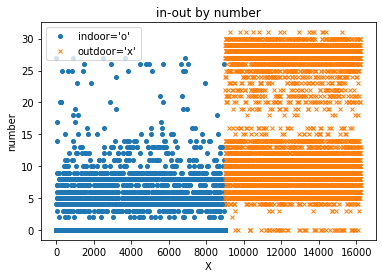

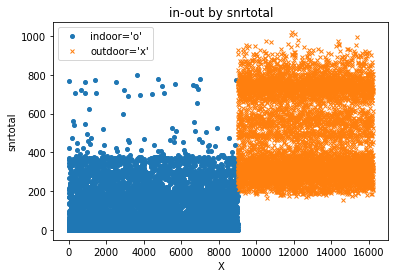

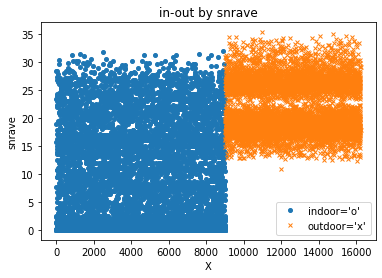

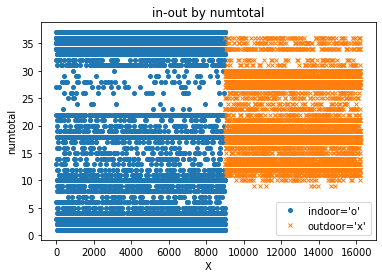

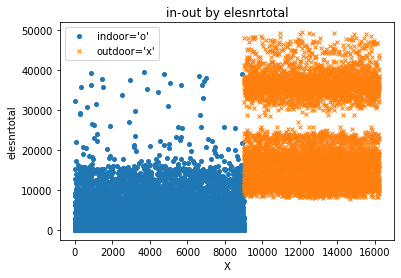

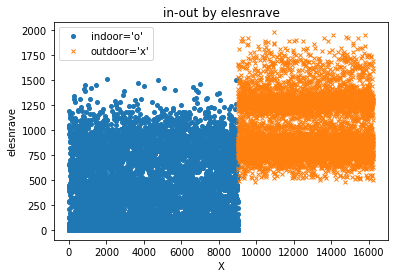

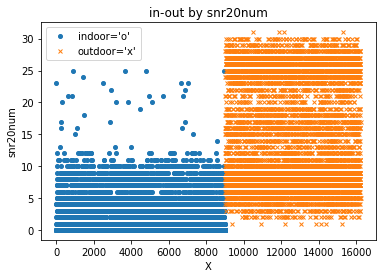

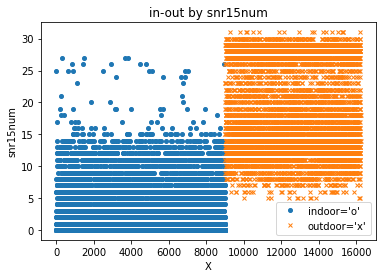

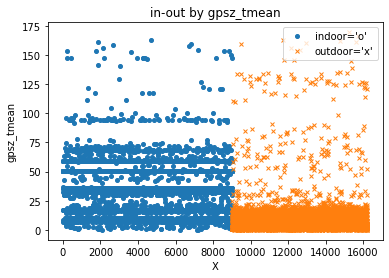

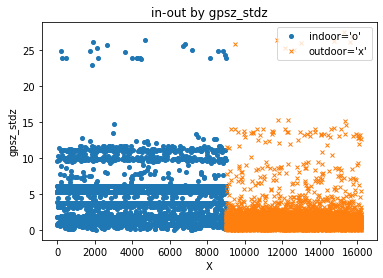

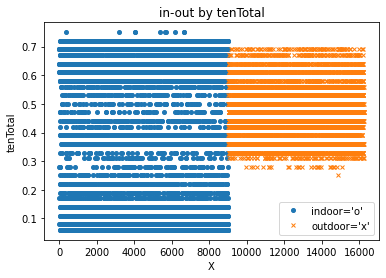

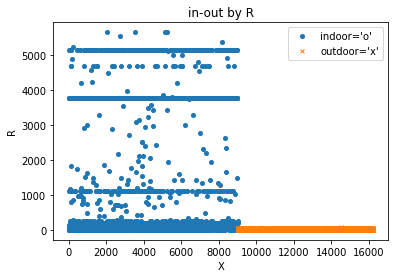

In [ ]:
#draw_graph(dataxy2, cols[0])
for i in range(12):
  draw_graph_update(dataxy2, cols[i])

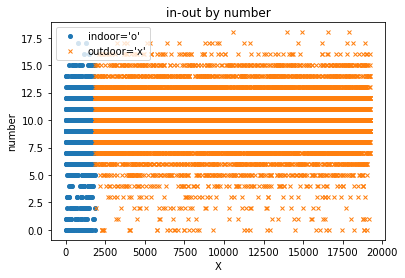

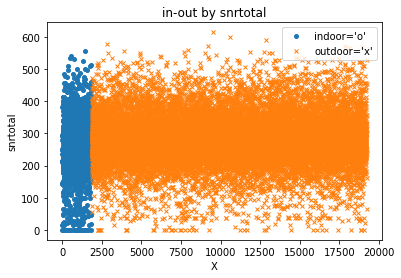

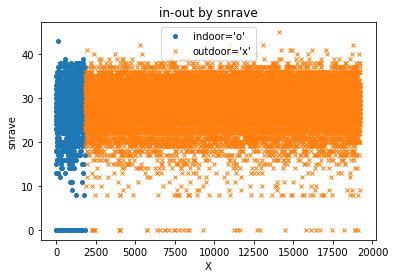

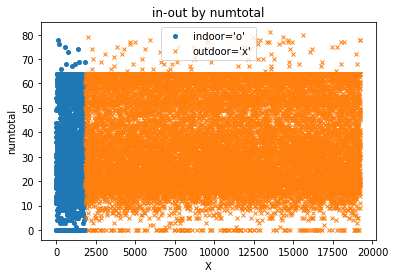

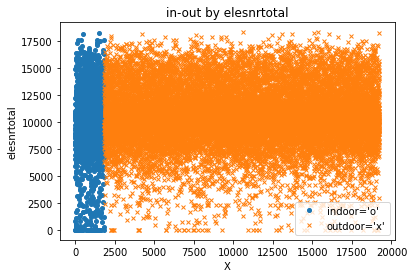

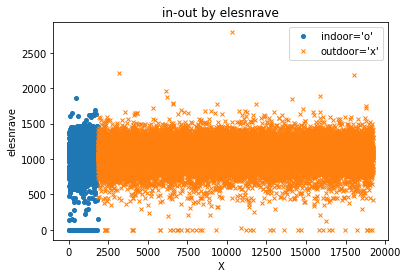

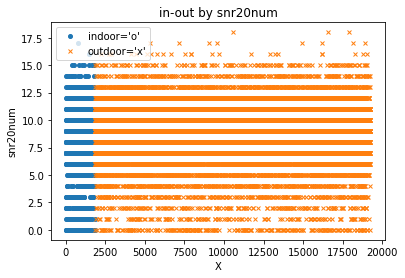

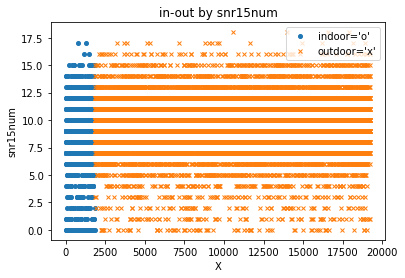

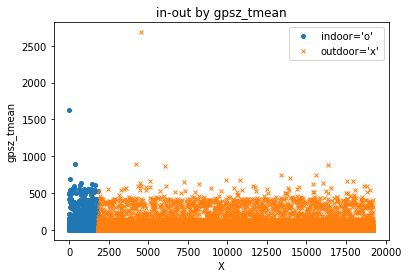

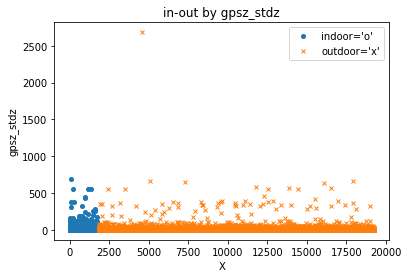

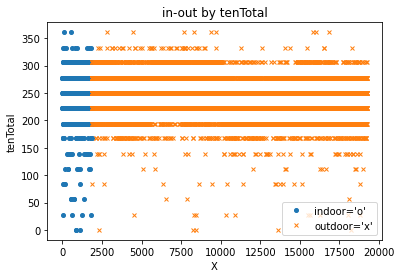

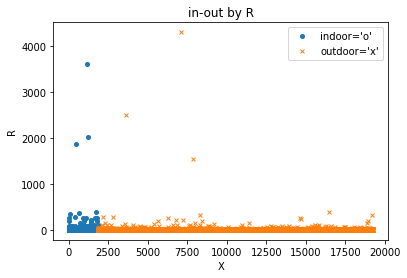

In [ ]:
for i in range(12):
  draw_graph_update(df04, cols[i]) # , cs=['orange', 'violet']

In [ ]:
tmp = dataxy2.loc[dataxy2["Class"]=="outdoor"]
mn = min(tmp["R"])
mx = max(tmp["R"])
print(mn, mx)
#
tmp = dataxy2.loc[dataxy2["Class"]=="indoor"]
mn = min(tmp["R"])
mx = max(tmp["R"])
print(mn, mx)


tmp = df05.loc[df05["Class"]=="outdoor"]
mn = min(tmp["R"])
mx = max(tmp["R"])
print(mn, mx)

tmp = df05.loc[df05["Class"]=="indoor"]
mn = min(tmp["R"])
mx = max(tmp["R"])
print(mn, mx)

1.0 70.8
6.0 5664.9
1.5 26.19
2.0 258.37


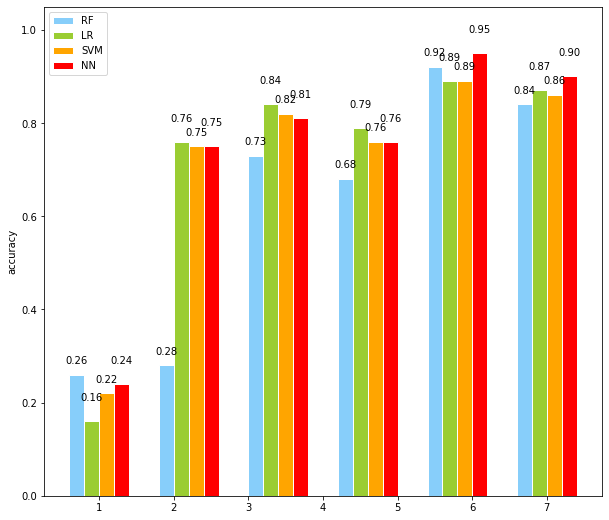

In [ ]:
# visualization

import matplotlib.pyplot as plt  
  
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(10,9))

n = 6
X = np.arange(n)+1
# 0.8, 1.0, 1.2
d1 = 0.1
d2 = 0.3
d3 = 0.5
d4 = 0.7
d5 = 0.9
d6 = 1.1
X1 = [0.6+d1, 1.6+d2, 2.6+d3, 3.6+d4, 4.6+d5, 5.6+d6]
X2 = [0.8+d1, 1.8+d2, 2.8+d3, 3.8+d4, 4.8+d5, 5.8+d6]
X3 = [1.0+d1, 2.0+d2, 3.0+d3, 4.0+d4, 5.0+d5, 6.0+d6]
X4 = [1.2+d1, 2.2+d2, 3.2+d3, 4.2+d4, 5.2+d5, 6.2+d6]

#X = ["01 # 地铁室外跑", "02 # 地铁站大棚", "03 # 楼梯电梯地下地铁站口", "04 # 其他地铁相关场景", "05 # 其他", "02-05 # 合集"]
#X是1,2,3,4,5,6,7,8,柱的个数
# numpy.random.uniform(low=0.0, high=1.0, size=None), normal
#uniform均匀分布的随机数，normal是正态分布的随机数，0.5-1均匀分布的数，一共有n个
Y1 = [0.26, 0.28, 0.73, 0.68, 0.92, 0.84]
Y2 = [0.16, 0.76, 0.84, 0.79, 0.89, 0.87]
Y3 = [0.22, 0.75, 0.82, 0.76, 0.89, 0.86]
Y4 = [0.24, 0.75, 0.81, 0.76, 0.95, 0.90]

#width:柱的宽度 0.2
wd = 0.2
plt.bar(X1,Y1,width = wd,facecolor = 'lightskyblue',edgecolor = 'white')
plt.bar(X2,Y2,width = wd,facecolor = 'yellowgreen',edgecolor = 'white')
plt.bar(X3,Y3,width = wd,facecolor = 'orange',edgecolor = 'white')
plt.bar(X4,Y4,width = wd,facecolor = 'red',edgecolor = 'white')


#水平柱状图plt.barh，属性中宽度width变成了高度height
#打两组数据时用+
#facecolor柱状图里填充的颜色
#edgecolor是边框的颜色
#想把一组数据打到下边，在数据前使用负号
#plt.bar(X, -Y2, width=width, facecolor='#ff9999', edgecolor='white')
#给图加text
for x,y in zip(X1,Y1):
  plt.text(x, y+0.02, '%.2f' % y, ha='center', va= 'bottom')
  
for x,y in zip(X2,Y2):
  plt.text(x, y+0.04, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X3,Y3):
  plt.text(x, y+0.02, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X4,Y4):
  plt.text(x, y+0.04, '%.2f' % y, ha='center', va= 'bottom')


plt.ylim(0,+1.05)
plt.legend(labels=['RF', 'LR', "SVM", "NN"], loc='upper left')
#plt.xlabel("testing data")
plt.ylabel("accuracy")

plt.show()



In [ ]:
# query
  # ll_h, GPS海拔高度
  # ll_n, GPS卫星数
  # ll_r, GPS定位半径
  # ll, llx, lly
  # gnsf

# info
  # inout_flag
  # llx, lly, 
  # llr

# result
  # indoor

def preprocess(line, search_table):
  ps = line.split(",")
  inout = ps[-1]
  dic = {}
  for p in ps[:-1]:
    kv = p.split(":")
    dic[kv[0]] = kv[1]
  if inout == "0":
    dic["Class"] = "outdoor"
  elif inout == "1":
    dic["Class"] = "indoor"
  #
  row = {}
  
  
  #
  gpsh = float(dic['ll_h'])
  gpsx = float(dic['llx'])
  gpsy = float(dic['lly'])
  
  #
  ns = dic['gnsf'].split("|")
  
  row['number'] = int(ns[2])
  row['snrtotal'] = int(ns[7])
  row['snrave'] = int(ns[6])
  row['numtotal'] = int(dic['ll_n'])
  row['elesnrtotal'] = int(ns[1])
  row['elesnrave'] = int(ns[0])
  row['snr20num'] = int(ns[5])
  row['snr15num'] = int(ns[4])
  row['gpsz_tmean'] = cal_gpsz_tmean(gpsx, gpsy, gpsh, search_table)
  row['gpsz_stdz'] = cal_gpsz_stdz(gpsx, gpsy, gpsh, search_table)
  row['tenTotal'] = int(ns[3])
  row['R'] = int(dic['ll_r'])
  #
  
  row["Class"]  = dic["Class"] 
  return row


f = open("st01.txt","r")
lns = f.readlines()

rows_list = []
error_num = 0

for ln in lns[:-1]:
  line = ln.strip()
  #print(line)
  try:
    row_tmp = preprocess(line, search_table)
    #print(len(row_tmp), row_tmp)
    rows_list.append(row_tmp)
  except:
    #print("error")
    error_num = error_num + 1

log_df = pd.DataFrame(rows_list)
print(error_num, len(log_df))
log_df
log_df.to_csv("log_data01.csv", index=False)

8873 19237


In [ ]:
log_df

,number,snrtotal,snrave,numtotal,elesnrtotal,elesnrave,snr20num,snr15num,gpsz_tmean,gpsz_stdz,tenTotal,R,Class
0,9,272,30,11,10571,1175,9,9,25.62,2.94,222,3,outdoor
1,13,369,28,37,13725,1056,12,13,2.10,0.25,250,3,outdoor
2,14,334,24,41,11430,816,9,13,6.98,0.82,250,9,outdoor
3,10,313,31,37,11636,1164,9,10,0.50,0.50,250,1,outdoor
4,9,236,26,22,9026,1003,8,9,19.20,2.27,250,2,outdoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,10,316,32,64,13082,1308,10,10,17.87,1.22,222,3,outdoor
19233,10,318,32,26,10857,1086,10,10,54.55,6.99,250,6,outdoor
19234,12,224,19,64,8610,718,6,8,35.46,28.44,250,3,outdoor
19235,9,213,24,24,7981,887,6,8,19.91,2.55,194,9,outdoor


In [ ]:
# 8G  341975
# 8N  1073036
# 6G1 341208
# 6G0 1026994
# 6N  46809
1026994 + 46809

1415021,
341975 + 1073036

1415011